### Resumen

#### Para entregar una tarjeta de crédito o un préstamo los bancos deben evaluar la situación crediticia de los clientes, para lo cual solicitan el servicio de una consultora encargada de evaluar el riesgo crediticio.
#### Las evaluaciones de riesgos crediticios son un método común de control de riesgos en la industria financiera. La información personal y los datos presentados por los solicitantes de tarjetas de crédito es utilizada para predecir la probabilidad de futuros incumplimientos y préstamos de tarjetas de crédito. A partir de esta información, el banco puede decidir si emite una tarjeta de crédito al solicitante, ya que los puntajes de crédito pueden cuantificar objetivamente la magnitud del riesgo.
#### En términos generales, las evaluaciones de riesgos crediticios se basan en datos históricos. Un método para clasificación crediticia es el modelo Logístico, ya que es adecuado para tareas de clasificación binaria y puede calcular los coeficientes de cada característica.
#### Por otro lado, en la actualidad, con el desarrollo de algoritmos de machine learning se han introducido métodos predictivos como Boosting, Random Forest y Support Vector Machines en la evaluación de riesgo crediticio, aunque en ocasiones estos métodos no tienen una buena transparencia y pueden ser difícil proporcionar a los clientes y bancos una razón para el rechazo o la aceptación de la emisión de una tarjeta de crédito.
#### Finalmente, el objetivo de este proyecto es construir un modelo de Machine Learning para predecir si los clientes solicitantes de tarjetas de crédito deben ser aceptados o rechazados, para lo cual se deberá realizar una limpieza de la base de datos y luego definir el modelo más adecuado.

### LECTURA DE DATOS Y PRIMERAS TRANSFORMACIONES

En este apartado se proceden a importar los archivos csv y realizar las primeras transformaciones sobre los datos. Para el proyecto contamos con dos fuentes de datos: un archivo llamado riesgo crediticio, el cual contiene información de los clientes y otro archivo de eventos crediticios, que almacena datos de pagos de tarjetas/créditos y las fechas en que se registran dichos eventos. 
Con estos archivos se generan los dataframes: aplication_record y credit_record respectivamente.

In [1]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix
#from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
#!pip install imbalanced-Learn
#!pip install mca
from imblearn.over_sampling import SMOTE
import mca
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Se cargan los archivos de riesgo crediticio
aplication_record = pd.read_csv(r"DataSets\application_record.csv")
credit_record = pd.read_csv(r"DataSets\credit_record.csv")

In [3]:
#Lectura del dataset aplication_record
aplication_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
#Lectura del dataset credit_record
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
#Información de las columnas del dataset aplication_record
aplication_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
#Se identifican las columnas del dataset credit_record
credit_record.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

### Limpieza de datos: Dataframe aplication_record

In [7]:
#Se verifica la existencia de ID duplicados
aplication_record.loc[aplication_record.ID.duplicated(keep=False)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4.0
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2.0
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
421698,7213374,M,Y,N,0,148500.0,Working,Secondary / secondary special,Married,House / apartment,-9950,-961,1,0,1,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433158,7282535,F,N,Y,0,63000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21124,365243,1,0,1,0,NaN,2.0
433159,7742853,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15052,-1695,1,0,0,0,Laborers,1.0
433217,7135270,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0
433666,7091721,F,Y,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14116,-2269,1,0,0,0,Medicine staff,2.0


In [8]:
#Se procede a eliminar los ID duplicados
aplication_record = aplication_record.drop_duplicates('ID')

aplication_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [9]:
#Se identifican la cantidad de datos nulos
aplication_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
# Se crean 2 dataframes auxiliares en donde se rellenan los valores nulos
aux1 = aplication_record[aplication_record.DAYS_EMPLOYED>0].fillna("Not working")
aux2 = aplication_record[aplication_record.DAYS_EMPLOYED<=0].fillna("Not informed")

In [11]:
# Se crea el dataframe aplication, concatenando los auxiliares
aplication = pd.concat([aplication_record,aux1,aux2])

aplication

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,Not informed,2.0
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0


In [12]:
#Se eliminan los valores nulos y duplicados por ID
aplication.dropna(inplace=True)

aplication.drop_duplicates('ID', inplace = True)

aplication

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438518,6835982,M,Y,Y,0,135000.0,Working,Incomplete higher,Married,House / apartment,-15293,-5244,1,1,1,0,Not informed,2.0
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,Not informed,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,Not informed,3.0
438544,6838056,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-18997,-483,1,0,0,0,Not informed,2.0


In [13]:
#Se eliminan los clientes repetidos
aplication = aplication.drop_duplicates(aplication.columns[~aplication.columns.isin(['ID'])],keep = 'first')

aplication

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
13,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2.0
19,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438385,6778643,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-17568,-807,1,0,1,0,Not informed,2.0
438511,6832883,M,Y,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10097,-1030,1,0,0,0,Not informed,2.0
438512,6833073,F,N,Y,2,120150.0,Working,Higher education,Single / not married,House / apartment,-16533,-5229,1,0,1,0,Not informed,4.0
438516,6835980,M,Y,Y,0,135000.0,Working,Incomplete higher,Married,House / apartment,-15293,-5244,1,1,1,0,Not informed,2.0


In [14]:
#Se transforman los nombres de las columnas a minusculas, para que sea mas facil trabajar
aplication = aplication.rename(columns=str.lower)

In [15]:
#Se crea la columna data_day, en donde se indica el día en el cual fueron obtenidos los datos. 
#Esta columna se utiliza para calcular luego las fechas de nacimiento de los clientes.sta columna se utiliza para calcular las fechas de cumpleaños.
aplication = aplication.assign(data_day = dt.datetime(2020,3,24))

aplication['data_day'] = pd.to_datetime(aplication['data_day']) #Conversión de la columna data_day a dato de tiempo

#Bucle para crear la columna birthday
birthday = []
for index, row in aplication.iterrows():  
    a = row['data_day']
    b = abs(row['days_birth'])
    aux = a - pd.Timedelta(b, unit = 'D')
    birthday.append(aux)
    
aplication['birthday'] = birthday

aplication

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,data_day,birthday
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,2020-03-24,1961-06-08
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,2020-03-24,1967-11-28
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,2020-03-24,1974-01-13
13,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2.0,2020-03-24,1971-07-22
19,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,2020-03-24,1991-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438385,6778643,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-17568,-807,1,0,1,0,Not informed,2.0,2020-03-24,1972-02-17
438511,6832883,M,Y,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10097,-1030,1,0,0,0,Not informed,2.0,2020-03-24,1992-08-01
438512,6833073,F,N,Y,2,120150.0,Working,Higher education,Single / not married,House / apartment,-16533,-5229,1,0,1,0,Not informed,4.0,2020-03-24,1974-12-18
438516,6835980,M,Y,Y,0,135000.0,Working,Incomplete higher,Married,House / apartment,-15293,-5244,1,1,1,0,Not informed,2.0,2020-03-24,1978-05-11


In [16]:
#Veo los tipos de datos
aplication.dtypes

id                              int64
code_gender                    object
flag_own_car                   object
flag_own_realty                object
cnt_children                    int64
amt_income_total              float64
name_income_type               object
name_education_type            object
name_family_status             object
name_housing_type              object
days_birth                      int64
days_employed                   int64
flag_mobil                      int64
flag_work_phone                 int64
flag_phone                      int64
flag_email                      int64
occupation_type                object
cnt_fam_members               float64
data_day               datetime64[ns]
birthday               datetime64[ns]
dtype: object

In [17]:
#Cardinalidad de datos
cardinalidad_aplication = pd.DataFrame({'Cantidad' : aplication.nunique(), "Porcentaje" : (aplication.nunique())/(aplication.shape[0])*(100)})
cardinalidad_aplication

,Cantidad,Porcentaje
id,90085,100.000000
code_gender,2,0.002220
flag_own_car,2,0.002220
flag_own_realty,2,0.002220
cnt_children,12,0.013321
amt_income_total,866,0.961314
name_income_type,5,0.005550
name_education_type,5,0.005550
name_family_status,5,0.005550
name_housing_type,6,0.006660


In [18]:
# Se convierten los datos al tipo correcto
aplication['id'] = aplication['id'].astype('str')
aplication['flag_mobil'] = aplication['flag_mobil'].astype('boolean')
aplication['flag_work_phone'] = aplication['flag_work_phone'].astype('boolean')
aplication['flag_phone'] = aplication['flag_phone'].astype('boolean')
aplication['flag_email'] = aplication['flag_email'].astype('boolean')
aplication['cnt_fam_members'] = aplication['cnt_fam_members'].astype('int64')

### Limpieza de datos: Dataframe Credit_record

In [19]:
#Se eliminan los registros duplicados
credit = credit_record.drop_duplicates()
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [20]:
#Se identifican la cantidad de datos nulos
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [21]:
#Se transforman los nombres de las columnas a minusculas, para que sea mas facil trabajar
credit = credit.rename(columns=str.lower)

In [22]:
#Se crea la columna data_day, en donde se indica el día en el cual fueron obtenidos los datos. 
#Esta columna se utiliza para calcular luego las fechas de nacimiento de los clientes.
credit = credit.assign(data_day = dt.datetime(2020,3,24))

credit['data_day'] = pd.to_datetime(credit['data_day']) #Conversión de la columna data_day a dato de tiempo

#Bucle para crear la columna month_balance_date
months_balance_date = []
for index, row in credit.iterrows():  
    a = row['data_day']
    b = abs(row['months_balance'])
    aux = a - relativedelta(months=b)
    months_balance_date.append(aux)
    
credit['months_balance_date'] = months_balance_date

credit

,id,months_balance,status,data_day,months_balance_date
0,5001711,0,X,2020-03-24,2020-03-24
1,5001711,-1,0,2020-03-24,2020-02-24
2,5001711,-2,0,2020-03-24,2020-01-24
3,5001711,-3,0,2020-03-24,2019-12-24
4,5001712,0,C,2020-03-24,2020-03-24
...,...,...,...,...,...
1048570,5150487,-25,C,2020-03-24,2018-02-24
1048571,5150487,-26,C,2020-03-24,2018-01-24
1048572,5150487,-27,C,2020-03-24,2017-12-24
1048573,5150487,-28,C,2020-03-24,2017-11-24


In [23]:
#Veo los tipos de datos
credit.dtypes

id                              int64
months_balance                  int64
status                         object
data_day               datetime64[ns]
months_balance_date    datetime64[ns]
dtype: object

In [24]:
#Cardinalidad de datos
cardinalidad_credit = pd.DataFrame({'Cantidad' : credit.nunique(), "Porcentaje" : (credit.nunique())/(credit.shape[0])*(100)})
cardinalidad_credit

,Cantidad,Porcentaje
id,45985,4.385476
months_balance,61,0.005817
status,8,0.000763
data_day,1,0.000095
months_balance_date,61,0.005817


In [25]:
# Se convierten los datos al tipo correcto
credit['id'] = credit['id'].astype('str')

### Unión de los dataframes: aplication y credit

In [26]:
#realizo el merge para los dataframes aplication y credit, a partir del campo id
df = pd.merge(aplication, credit, left_on = 'id', right_on = 'id')
df.drop(['data_day_y'], axis = 1, inplace = True)
df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,data_day_x,birthday,months_balance,status,months_balance_date
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Security staff,2,2020-03-24,1961-06-08,0,C,2020-03-24
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Security staff,2,2020-03-24,1961-06-08,-1,C,2020-02-24
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Security staff,2,2020-03-24,1961-06-08,-2,C,2020-01-24
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Security staff,2,2020-03-24,1961-06-08,-3,C,2019-12-24
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Security staff,2,2020-03-24,1961-06-08,-4,C,2019-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219168,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Not informed,2,2020-03-24,1967-12-07,-17,X,2018-10-24
219169,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Not informed,2,2020-03-24,1967-12-07,-18,2,2018-09-24
219170,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Not informed,2,2020-03-24,1967-12-07,-19,X,2018-08-24
219171,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,Not informed,2,2020-03-24,1967-12-07,-20,0,2018-07-24


In [27]:
#Calculo de la edad de los clientes (restando las columnas Data_day - Birthday)


df['edad_dias'] =  (df['data_day_x'] - df['birthday']).dt.days ### devuelve una serie con los dias en formato int64
df['edad'] = df['edad_dias']/365 ### transformado en año diviendo por el año gregoriano
df['edad'] = df['edad'].astype(int) ## convirtiendo a entero


In [28]:
#Defino categorías para los ingresos de los clientes

elemento = 6000
elemento2 = 30000
elemnto3 = 0

lista1 = [0]
lista2= [30000]

for i in range (17):
    elemento += 24000
    elemento2 += 24000
    lista1.append(elemento)
    lista2.append(elemento2)

lista2[17]=9999999999

lista3 = []

lista3.append("< 30k")

for i in range(16):
    lista3.append(str(int(lista1[i+1]/1000))+"-"+str(int(lista2[i+1]/1000))+"k")

lista3.append("> 414k")

In [29]:
for i in range(len(lista1)):
    df.loc[(df['amt_income_total']>lista1[i]) & (df['amt_income_total']<=lista2[i]), "categoria_sueldo"] = lista3[i]
df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,occupation_type,cnt_fam_members,data_day_x,birthday,months_balance,status,months_balance_date,edad_dias,edad,categoria_sueldo
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,0,C,2020-03-24,21474,58,102-126k
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,-1,C,2020-02-24,21474,58,102-126k
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,-2,C,2020-01-24,21474,58,102-126k
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,-3,C,2019-12-24,21474,58,102-126k
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,-4,C,2019-11-24,21474,58,102-126k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219168,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1967-12-07,-17,X,2018-10-24,19101,52,78-102k
219169,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1967-12-07,-18,2,2018-09-24,19101,52,78-102k
219170,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1967-12-07,-19,X,2018-08-24,19101,52,78-102k
219171,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1967-12-07,-20,0,2018-07-24,19101,52,78-102k


### Identificar datos outliers

C:\Users\GUILLERMO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GUILLERMO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


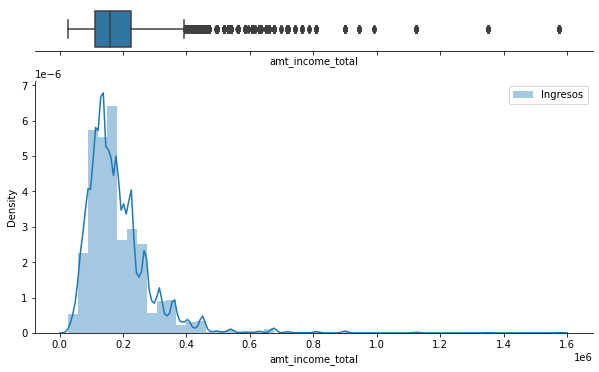

In [30]:
#Realizo un gráfico con matplotlib, que me permite identificar valores que se alejan de la media

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['amt_income_total'], ax=ax_box) 
sns.distplot(df['amt_income_total'], ax=ax_hist, label='Ingresos')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [31]:
#Calculo de umbral inferior y superior amt_income_total
IQR = df['amt_income_total'].quantile(0.75) - df['amt_income_total'].quantile(0.25)
umbral_inferior = df['amt_income_total'].quantile(0.25) - IQR*1.5
umbral_superior = df['amt_income_total'].quantile(0.75) + IQR*1.5
#Identifico los valores outliers en el dataframe
df['amt_income_total_outliers'] = 0
df.loc[df['amt_income_total'] > umbral_superior, 'amt_income_total_outliers'] = 1

In [32]:
#Cuento la cantidad de valores outliers amt_income_total
df['amt_income_total_outliers'].value_counts()

0    211695
1      7478
Name: amt_income_total_outliers, dtype: int64

In [33]:
#Calculo de umbral inferior y superior cnt_children
IQR = df['cnt_children'].quantile(0.75) - df['cnt_children'].quantile(0.25)
umbral_inferior = df['cnt_children'].quantile(0.25) - IQR*1.5
umbral_superior = df['cnt_children'].quantile(0.75) + IQR*1.5
#Identifico los valores outliers en el dataframe
df['cnt_children_outliers'] = 0
df.loc[df['cnt_children'] > umbral_superior, 'cnt_children_outliers'] = 1

In [34]:
#Cuento la cantidad de valores outliers cnt_children
df['cnt_children_outliers'].value_counts()

0    215610
1      3563
Name: cnt_children_outliers, dtype: int64

In [35]:
#Calculo de umbral inferior y superior cnt_fam_members
IQR = df['cnt_fam_members'].quantile(0.75) - df['cnt_fam_members'].quantile(0.25)
umbral_inferior = df['cnt_fam_members'].quantile(0.25) - IQR*1.5
umbral_superior = df['cnt_fam_members'].quantile(0.75) + IQR*1.5
#Identifico los valores outliers en el dataframe
df['cnt_fam_members_outliers'] = 0
df.loc[df['cnt_fam_members'] > umbral_superior, 'cnt_fam_members_outliers'] = 1

In [36]:
#Cuento la cantidad de valores outliers cnt_fam_members
df['cnt_fam_members_outliers'].value_counts()

0    215776
1      3397
Name: cnt_fam_members_outliers, dtype: int64

In [37]:
# Obtengo los registros únicos de los clientes y elimino las columnas: 'months_balance','status','months_balance_date'.

df_unicos = df.drop_duplicates(subset='id')

df_unicos = df_unicos.drop(['months_balance','status','months_balance_date'],axis=1)

df_unicos

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,occupation_type,cnt_fam_members,data_day_x,birthday,edad_dias,edad,categoria_sueldo,amt_income_total_outliers,cnt_children_outliers,cnt_fam_members_outliers
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,2020-03-24,1961-06-08,21474,58,102-126k,0,0,0
30,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,2020-03-24,1967-11-28,19110,52,246-270k,0,0,0
35,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2,2020-03-24,1974-01-13,16872,46,246-270k,0,0,0
41,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,Laborers,2,2020-03-24,1971-07-22,17778,48,126-150k,0,0,0
49,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,Accountants,2,2020-03-24,1991-01-07,10669,29,126-150k,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219060,5100118,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1964-07-04,20352,55,102-126k,0,0,0
219081,5105801,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Not informed,2,2020-03-24,1967-02-12,19399,53,102-126k,0,0,0
219120,5145760,F,Y,N,0,135000.0,Working,Higher education,Married,House / apartment,...,Not informed,2,2020-03-24,1977-11-17,15468,42,126-150k,0,0,0
219131,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,Not informed,2,2020-03-24,1976-11-13,15837,43,102-126k,0,0,0


### Análisis exploratorio de los datos 


En este apartado se procederá a realizar una exploración gráfica de los datos.

In [38]:
#Estadídisticas básicas del dataframe

df_unicos.describe()

,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,edad_dias,edad,amt_income_total_outliers,cnt_children_outliers,cnt_fam_members_outliers
count,9709.000000,9.709000e+03,9709.000000,9709.000000,9709,9709,9709,9709,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
unique,NaN,NaN,NaN,NaN,1,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,9709,7598,6916,8859,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.422804,1.812282e+05,-15991.811618,61732.846328,NaN,NaN,NaN,NaN,2.182614,15991.811618,43.309198,0.032753,0.015656,0.014626
std,0.767019,9.927731e+04,4246.224468,139656.322958,NaN,NaN,NaN,NaN,0.932918,4246.224468,11.635746,0.177999,0.124145,0.120055
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,NaN,NaN,NaN,NaN,1.000000,7489.000000,20.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,-19565.000000,-2995.000000,NaN,NaN,NaN,NaN,2.000000,12440.000000,34.000000,0.000000,0.000000,0.000000
50%,0.000000,1.575000e+05,-15611.000000,-1374.000000,NaN,NaN,NaN,NaN,2.000000,15611.000000,42.000000,0.000000,0.000000,0.000000
75%,1.000000,2.250000e+05,-12440.000000,-339.000000,NaN,NaN,NaN,NaN,3.000000,19565.000000,53.000000,0.000000,0.000000,0.000000


In [39]:
#Se declara el estilo de los gráficos
mpl.style.use('bmh')

#### Comparación de ingresos entre Hombres y Mujeres

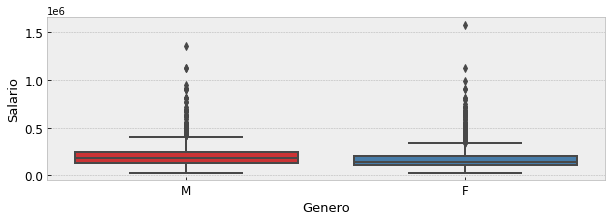

In [40]:
#Boxplot salario masculino vs femenino seaborn
fig_dims = (10,3)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_unicos, x = 'code_gender', y = 'amt_income_total', palette = 'Set1')
b1.set_xlabel('Genero', fontsize = 13)
b1.set_ylabel('Salario', fontsize = 13)
b1.tick_params(labelsize = 12)

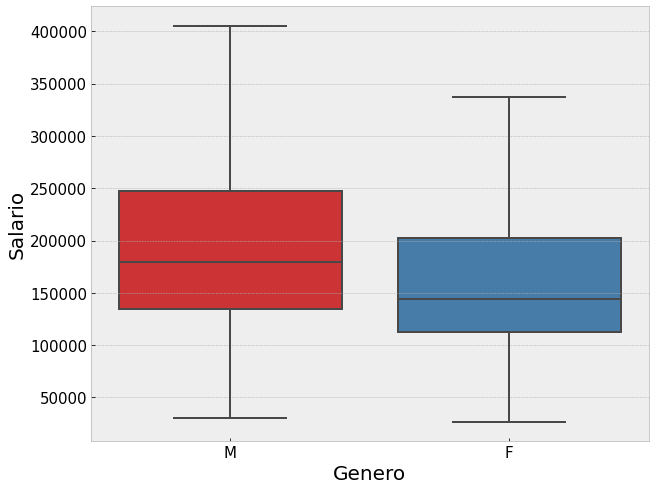

In [41]:
#Boxplot salario masculino vs femenino sin outliers seaborn
fig_dims = (10,8)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_unicos, x = 'code_gender', y = 'amt_income_total', palette = 'Set1', showfliers = False)
b1.set_xlabel('Genero', fontsize = 20)
b1.set_ylabel('Salario', fontsize = 20)
b1.tick_params(labelsize = 15)

Se realizó un histográma con seaborn en donde se muestran los ingresos anuales entre hombres y mujeres menores a 400.000 dólares, debido a que los ingresos superiores son considerados outliers.

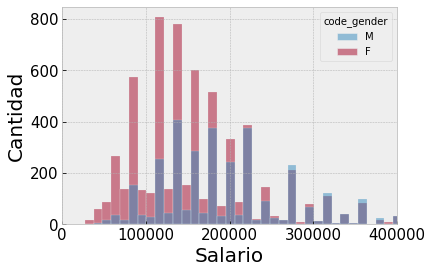

In [42]:
#Histograma salario masculino vs femenino
fig_dims = (10,3)
h = sns.histplot(data = df_unicos, x = 'amt_income_total', hue = 'code_gender')
plt.xlim(0,400000) #aisgno el valor 500000 para no mostrar los outliers en el gráfico
h.set_xlabel('Salario', fontsize = 20)
h.set_ylabel('Cantidad', fontsize = 20)
h.tick_params(labelsize = 15)

Conclusiones:La media de ingresos anuales del género masculino es superior a la media de ingresos anules del género femenino. En el boxplot con datos outliers se puede observar que el mayor ingreso anual corresponde al género femenino.

#### Ingresos de los clientes por nivel de educación

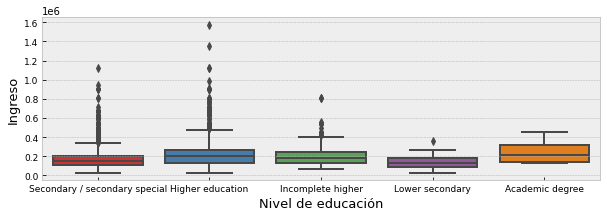

In [43]:
#Se realizó un boxplot con seaborn que grafica los ingresos anuales diferenciado por nivel de educación de las personas.
fig_dims = (10,3)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_unicos, x = 'name_education_type', y = 'amt_income_total', palette = 'Set1')
b1.set_xlabel('Nivel de educación', fontsize = 13)
b1.set_ylabel('Ingreso', fontsize = 13)
b1.tick_params(labelsize = 9)

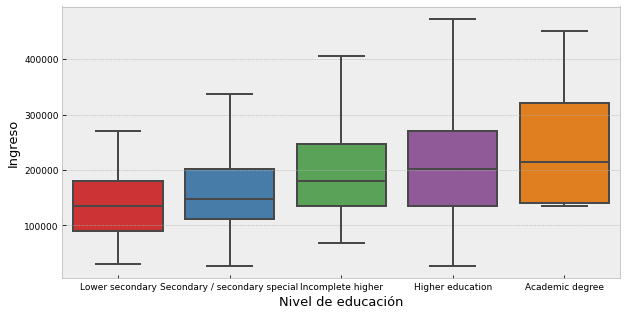

In [44]:
#Salario por nivel de educación sin outliers seaborn

lista_ordenado = ['Lower secondary','Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

df_unicos = df_unicos.set_index('name_education_type').loc[lista_ordenado].reset_index()

fig_dims = (10,5)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_unicos, x = 'name_education_type', y = 'amt_income_total', palette = 'Set1', showfliers = False)
b1.set_xlabel('Nivel de educación', fontsize = 13)
b1.set_ylabel('Ingreso', fontsize = 13)
b1.tick_params(labelsize = 9)


Como el dataframe posee valores atípicos en el campo amt_income_total, el boxplot obtenido no permite visualizar correctamente las diferencias entre los salarios según el nivel de educación, por este motivo se realiza el boxplot sin outliers. Se obtienen como conclusiones: La media de ingresos anuales de las personas que poseen un título de educación superior. En el boxplot con datos outliers se puede observar que el mayor ingreso anual corresponde a una persona que tiene secundario como nivel de educación.


#### Cantidad de hijos de los clientes, diferenciado por nivel de educación

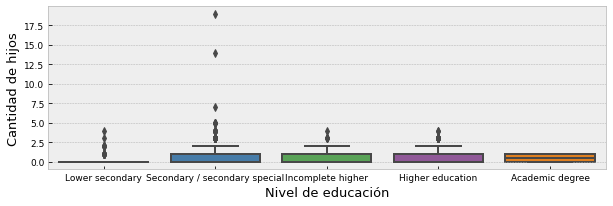

In [45]:
#Hijos por nivel de educación seaborn
fig_dims = (10,3)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_unicos, x = 'name_education_type', y = 'cnt_children', palette = 'Set1')
b1.set_xlabel('Nivel de educación', fontsize = 13)
b1.set_ylabel('Cantidad de hijos', fontsize = 13)
b1.tick_params(labelsize = 9)

Conclusiones: Se puede observar que las personas con un nivel de educación secundario son las que mayor cantidad de datos outliers tienen.
No se puede concluir que la cantidad de hijos de los clientes dependa del nivel de educación.


#### Cantidad de clientes por tipo de vivienda

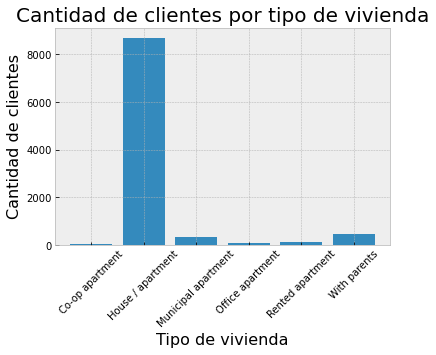

In [46]:
#Agrupo los clientes por tipo de vivienda
df_vivienda = df_unicos.groupby(['name_housing_type']).agg(id_count = ('id', 'count'),).reset_index()

#Gráfico de barras que muestra el tipo de vivienda de los clientes
x1 = df_vivienda.name_housing_type
y1 = df_vivienda.id_count

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico
plt.rcParams["figure.figsize"] = (15, 5)
axes = plt.gca()
axes.set_title('Cantidad de clientes por tipo de vivienda')
axes.set_xlabel('Tipo de vivienda')
axes.set_ylabel('Cantidad de clientes')
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.xticks(fontsize = 10)
plt.xticks(rotation=45)
plt.show()

Conclusión: Se puede ver en la gráfica que la mayoría de los clientes viven en una casa o departamento. 

#### Clientes por tipo de trabajo

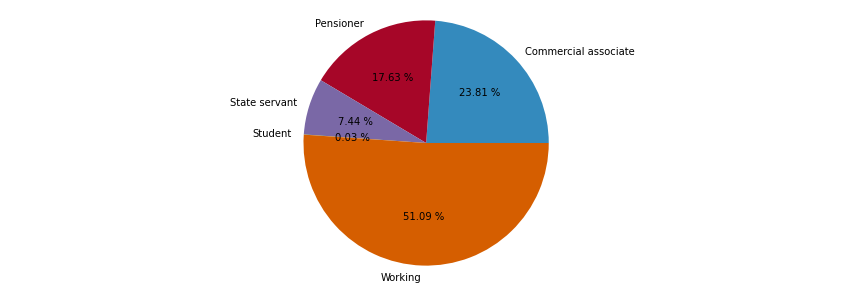

In [47]:
#Agrupo los clientes por tipo de trabajo
df_trabajo = df_unicos.groupby(['name_income_type']).agg(id_count = ('id', 'count'),).reset_index()

#Gráfico cantidad de clientes por tipo de trabajo
plt.pie(df_trabajo.id_count, labels=df_trabajo.name_income_type, autopct="%0.2f %%")
plt.axis("equal")
plt.show()

#### Clientes por estado civil

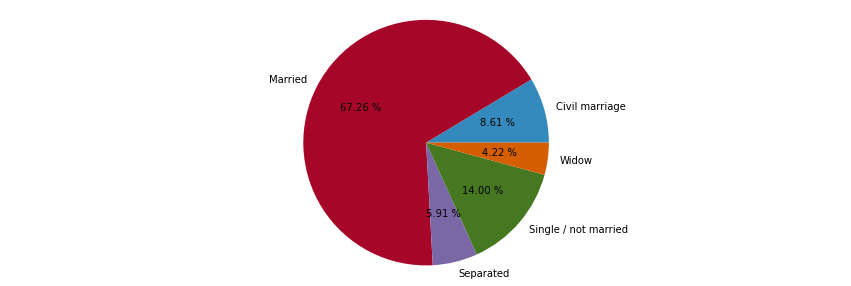

In [48]:
#Agrupo los clientes por estado civil
df_trabajo = df_unicos.groupby(['name_family_status']).agg(id_count = ('id', 'count'),).reset_index()

#Gráfico cantidad de clientes por estado civil
plt.pie(df_trabajo.id_count, labels=df_trabajo.name_family_status, autopct="%0.2f %%")
plt.axis("equal")
plt.show()

#### Ingreso de los clientes por edad

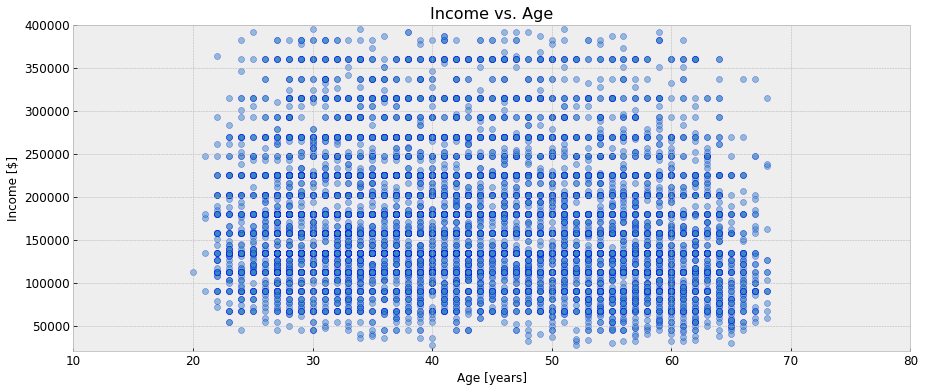

In [49]:
# Realizo el gráfico Ingreso vs Edad

plt.figure(figsize=(15,6))
plt.scatter(df_unicos['edad'], df_unicos['amt_income_total'], edgecolor='b', alpha=0.5)
plt.xlim(10, 80)
plt.xlabel('Age [years]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(20000, 400000)
plt.ylabel('Income [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income vs. Age', fontsize=16)
plt.show()

Conclusiones: Como se observa en el gráfico no se pueden determinar subgrupos de clientes. 
Por otro lado, se puede observar que la mayor parte de los clientes se agrupan entre ingresos de 50.000 usd y 200.000 usd y edades de 20 años y 65 años, ya que es la zona de mayor densidad en el gráfico


#### Ingresos de los clientes vs Status

Para obtener los siguientes gráficos fue necesario previamente realizar el cálculo porcentual de clientes con los diferentes status, discriminado por rango de ingreso de los mismos.

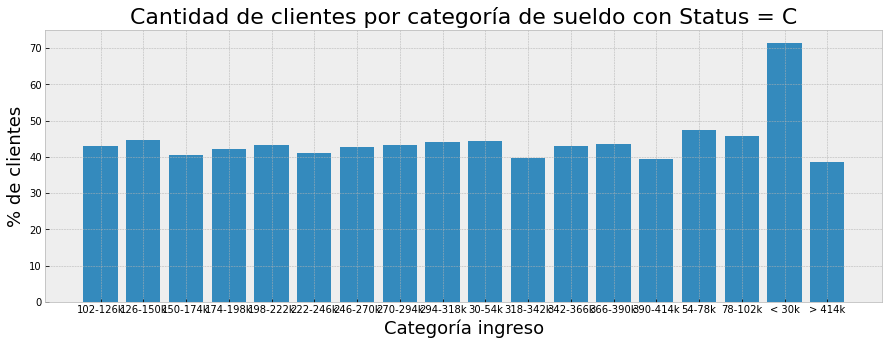

In [50]:
#Calculo porcentual de clientes con status = C, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='C')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_C = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_C.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_C['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_C.categoria_sueldo
y1 = df_C.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = C')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusiones: los que ganan en el rango de menos de 30 k de ingreso tienen deudas canceladas en el mes y representan el 70% del total de clientes. También se puede concluir que de forma general independiente del rango de sueldo de los clientes más del 35% de los clientes tienen status= C.

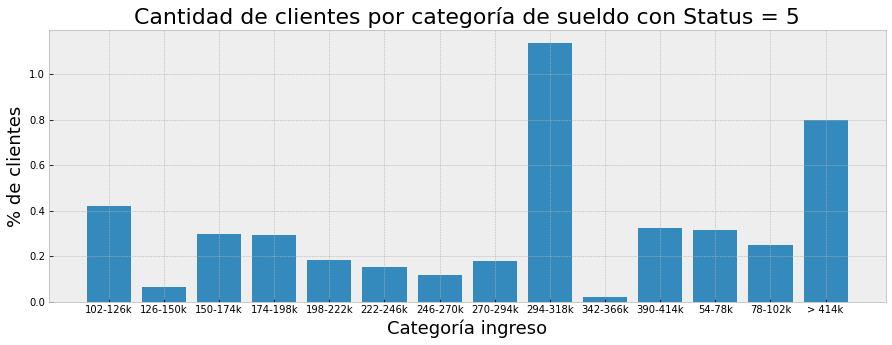

In [51]:
#Calculo porcentual de clientes con status = 5, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='5')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_5 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_5.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_5['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_5.categoria_sueldo
y1 = df_5.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 5')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusiones: los clientes con ingresos de 294 a 318 k son los que más tienen status = 5 (deudas incobrables o canceladas luego de 150 días) y superan el 1% de los clientes en ese rango de ingreso.

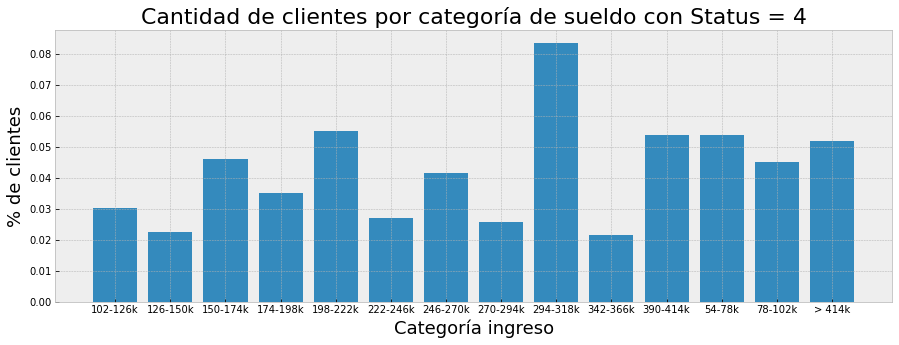

In [52]:
#Calculo porcentual de clientes con status = 4, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='4')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_4 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_4.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_4['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_4.categoria_sueldo
y1 = df_4.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 4')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusiones: los clientes con ingresos de 294-318 k son los que más tienen status = 4, y no superan el 1% de los clientes en ese rango de ingreso.

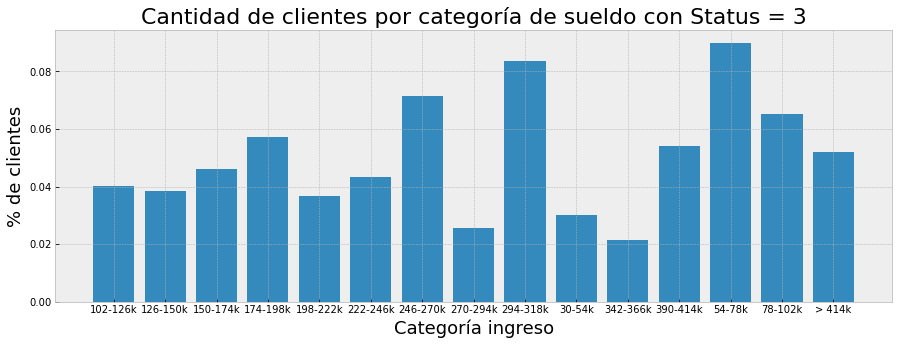

In [53]:
#Calculo porcentual de clientes con status = 3, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='3')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_3 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_3.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_3['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_3.categoria_sueldo
y1 = df_3.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 3')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusión: los cleintes con ingresos de 54-78 k y 294-318 k son los que más tienen status = 3, y no superan el 1% de los cleintes en ese rango de ingreso.

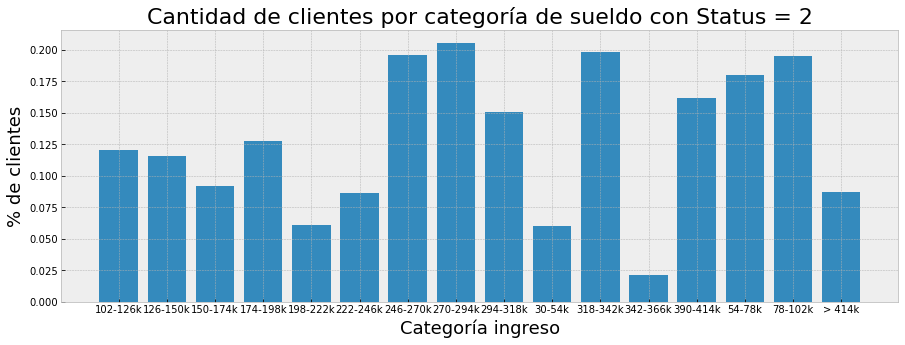

In [54]:
#Calculo porcentual de clientes con status = 2, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='2')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_2 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_2.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_2['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_2.categoria_sueldo
y1 = df_2.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 2')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusión: los clientes que tienen status = 2, son una muestra muy pequeña, que no superan el 0.2%

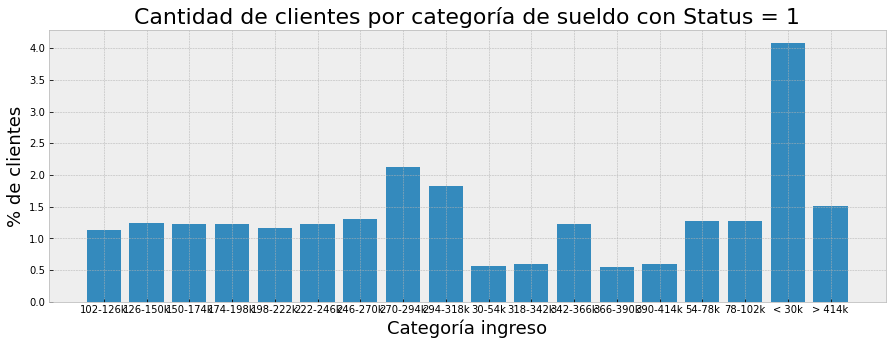

In [55]:
#Calculo porcentual de clientes con status = 1, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='1')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_1 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_1.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_1['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_1.categoria_sueldo
y1 = df_1.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 1')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusión: los clientes que con ingresos de menos de 30 k son los que en porcentaje tienen status= 1, y son el 4% de los clientes en ese rango de ingresos.

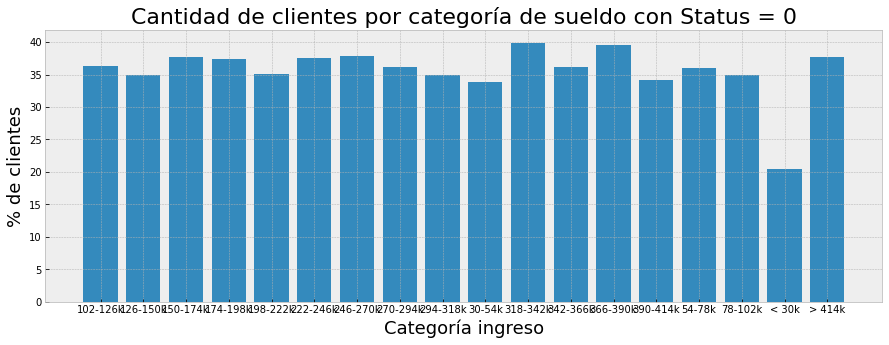

In [56]:
#Calculo porcentual de clientes con status = 0, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='0')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_0 = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_0.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_0['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_0.categoria_sueldo
y1 = df_0.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = 0')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusión: el 20% de los clientes con ingresos de menos de 30 k tienen status = 0, entre los ingresos de 30k a más de 414 k superan siempre el 30% de los clientes con status = 0.

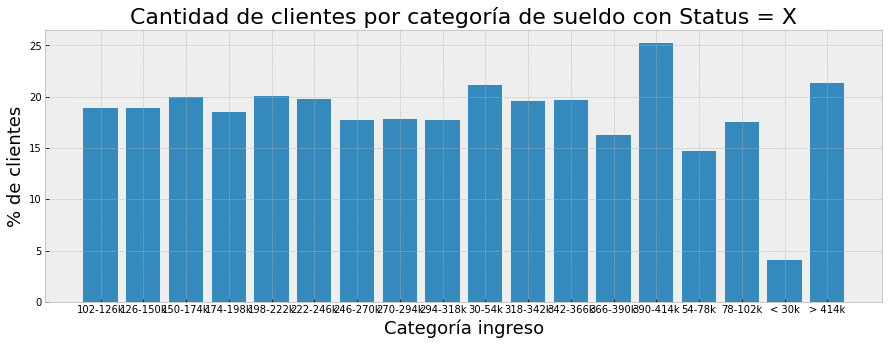

In [57]:
#Calculo porcentual de clientes con status = X, discriminado por rango de ingreso de los clientes

df_count_categoria_sueldo = df.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_count_categoria_sueldo

df_cat_sueldo = df.loc[(df['status']=='X')]
df_cat_sueldo = df_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_cat_sueldo

df_X = pd.merge(df_count_categoria_sueldo,df_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_X['division'] = division


#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes que más tienen un Status=C
x1 = df_X.categoria_sueldo
y1 = df_X.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo con Status = X')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(22)
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Conclusiones: los clientes que porcentualmente tienen status=X (sin prestamos en el mes) son los que tienen ingresos entre 390 a 414 k, y representan el 25% de la totalidad de los clientes en ese rango de ingresos.

## STORYTELLING

Para entregar una tarjeta de crédito o un préstamo los bancos deben evaluar la situación crediticia de los clientes, para lo cual solicitan el servicio de una consultora encargada de evaluar el riesgo crediticio.
Las evaluaciones de riesgos crediticios son un método común de control de riesgos en la industria financiera. La información personal y los datos presentados por los solicitantes de tarjetas de crédito es utilizada para predecir la probabilidad de futuros incumplimientos y préstamos de tarjetas de crédito. A partir de esta información, el banco puede decidir si emite una tarjeta de crédito al solicitante, ya que los puntajes de crédito pueden cuantificar objetivamente la magnitud del riesgo.
La pregunta que hay que realizarse es ¿cuáles son las variables que mayormente explican a mis clientes rechazados?, para esto, se analizaron los siguientes atributos:


In [58]:
#Establesco cuales son los clientes que voy a aceptar y cuales no, según la columna status. 
#Los clientes que serán aceptados tendran el valor 1 como status en todos los meses que se registró un evento.
#Los clientes rechazados serán aquellos que en al menos un mes tengan un status = 0.

#df = df.assign(cliente_aceptado = '0')
df.loc[(df['status']=='C'),'cliente_aceptado']= 1
df.loc[(df['status']=='0'),'cliente_aceptado']= 1
df.loc[(df['status']=='1'),'cliente_aceptado']= 0
df.loc[(df['status']=='X'),'cliente_aceptado']= 2
df.loc[(df['status']=='2'),'cliente_aceptado']= 0
df.loc[(df['status']=='3'),'cliente_aceptado']= 0
df.loc[(df['status']=='4'),'cliente_aceptado']= 0
df.loc[(df['status']=='5'),'cliente_aceptado']= 0

In [59]:
#creo un dataframe de los clientes No aceptados (rechazados)
df_no_aceptado = df.loc[df['cliente_aceptado'] == 0]
df_no_aceptado = df_no_aceptado.drop_duplicates('id')
lista_no_aceptado = df_no_aceptado['id'].tolist()

#creo un dataframe de clientes aceptados
df_aceptados = df

In [60]:
for i in lista_no_aceptado:
    df_aceptados.drop(df.index[df.id == i], axis=0, inplace =True)

In [61]:
df_aceptados = df_aceptados.drop_duplicates('id')
df_aceptados #clientes aceptados

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,months_balance,status,months_balance_date,edad_dias,edad,categoria_sueldo,amt_income_total_outliers,cnt_children_outliers,cnt_fam_members_outliers,cliente_aceptado
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,C,2020-03-24,21474,58,102-126k,0,0,0,1.0
30,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,2020-03-24,19110,52,246-270k,0,0,0,1.0
35,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,0,0,2020-03-24,16872,46,246-270k,0,0,0,1.0
41,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-10,X,2019-05-24,17778,48,126-150k,0,0,0,2.0
107,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-8,C,2019-07-24,12689,34,246-270k,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218728,5149987,F,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,C,2020-03-24,16805,46,294-318k,0,0,0,1.0
218764,5150009,M,Y,Y,1,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-9,C,2019-06-24,14450,39,174-198k,0,0,0,1.0
218768,5150112,F,Y,N,0,63000.0,Commercial associate,Higher education,Married,With parents,...,0,0,2020-03-24,13288,36,54-78k,0,0,0,1.0
218797,5150283,F,Y,Y,0,81000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,C,2020-03-24,18067,49,78-102k,0,0,0,1.0


In [62]:
df_aceptados = df_aceptados.loc[df['cliente_aceptado'] == 1]

In [63]:
#Concateno los dataframes de clientes aceptados y no aceptados
df = pd.concat([df_aceptados, df_no_aceptado])
df.shape

(7439, 30)

In [64]:
#Veo la distribución de mis variables categoricas
for col in df.columns[~df.columns.isin(['id','amt_income_total', 'edad', 'cnt_children', 'cnt_fam_members','days_birth','days_employed','data_day_x','birthday','months_balance','months_balance_date','edad_dias','amt_income_total_outliers','cnt_children_outliers','cnt_fam_members_outliers'])] :
    print("Para la columna {} la distribución es:\n {}".format(col, df[col].value_counts(normalize=True)))
    print("")

Para la columna code_gender la distribución es:
 F    0.650625
M    0.349375
Name: code_gender, dtype: float64

Para la columna flag_own_car la distribución es:
 N    0.636241
Y    0.363759
Name: flag_own_car, dtype: float64

Para la columna flag_own_realty la distribución es:
 Y    0.673612
N    0.326388
Name: flag_own_realty, dtype: float64

Para la columna name_income_type la distribución es:
 Working                 0.510687
Commercial associate    0.238607
Pensioner               0.177846
State servant           0.072456
Student                 0.000403
Name: name_income_type, dtype: float64

Para la columna name_education_type la distribución es:
 Secondary / secondary special    0.696733
Higher education                 0.251243
Incomplete higher                0.039253
Lower secondary                  0.011964
Academic degree                  0.000807
Name: name_education_type, dtype: float64

Para la columna name_family_status la distribución es:
 Married                 0.670

In [65]:
#Unifico la categoría Married, ya que civil marriage es similar
df.loc[(df['name_family_status']=='Civil marriage'),'name_family_status']='Married'
df['name_family_status'].unique()

array(['Married', 'Single / not married', 'Separated', 'Widow'],
      dtype=object)

In [66]:
#Reinicio los indices
df = df.reset_index(drop = True)
df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,months_balance,status,months_balance_date,edad_dias,edad,categoria_sueldo,amt_income_total_outliers,cnt_children_outliers,cnt_fam_members_outliers,cliente_aceptado
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,C,2020-03-24,21474,58,102-126k,0,0,0,1.0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,2020-03-24,19110,52,246-270k,0,0,0,1.0
2,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,0,0,2020-03-24,16872,46,246-270k,0,0,0,1.0
3,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-8,C,2019-07-24,12689,34,246-270k,0,1,1,1.0
4,5008844,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-11,C,2019-04-24,20502,56,102-126k,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,5100118,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,-8,2,2019-07-24,20352,55,102-126k,0,0,0,0.0
7435,5105801,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-28,1,2017-11-24,19399,53,102-126k,0,0,0,0.0
7436,5145760,F,Y,N,0,135000.0,Working,Higher education,Married,House / apartment,...,-4,1,2019-11-24,15468,42,126-150k,0,0,0,0.0
7437,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-11,1,2019-04-24,15837,43,102-126k,0,0,0,0.0


In [67]:
# Creo una copia en Excel del dataframe
df_story = df.copy()

df_story.to_excel('df_story.xlsx')

In [68]:
#Se cargan los archivos de df_story

df_story = pd.read_excel(r"df_story.xlsx", sheet_name = "Sheet1")

In [69]:
#creo la columna año_mes en el dataframe original del proyecto
df_story['months_balance_date'] = df_story['months_balance_date'].astype('str')
left = df_story['months_balance_date'].str[:7]
aux = pd.DataFrame(left)
aux = aux.rename(columns = {'months_balance_date':'anio_mes'})
df_story = aux.merge(df_story, how='inner', left_index=True, right_index=True)

#### Ingreso de los clientes Rechazados

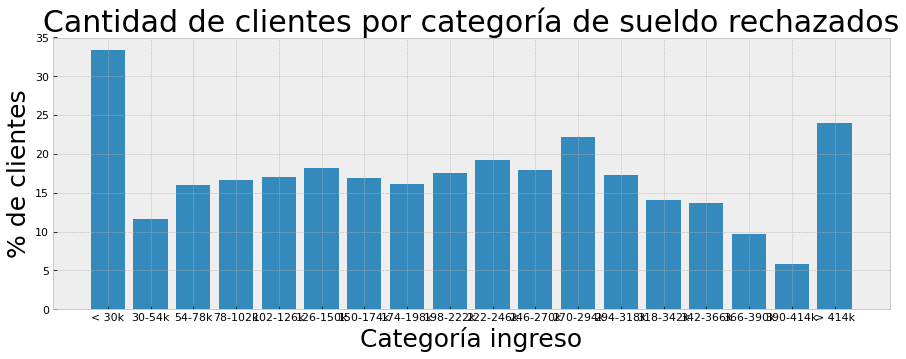

In [70]:
#Calculo porcentual de clientes con cliente rechazados, discriminado por rango de ingreso de los clientes

lista_ordenado = ['< 30k','30-54k','54-78k','78-102k','102-126k','126-150k','150-174k','174-198k','198-222k','222-246k','246-270k','270-294k','294-318k','318-342k','342-366k','366-390k','390-414k','> 414k']

df_story_count_categoria_sueldo = df_story.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()
df_story_count_categoria_sueldo

df_story_cat_sueldo = df_story.loc[(df_story['cliente_aceptado']==0)]
df_story_cat_sueldo = df_story_cat_sueldo.groupby(['categoria_sueldo']).agg(id_count = ('id', 'count'),).reset_index()

df_story_cat_sueldo

df_story_X = pd.merge(df_story_count_categoria_sueldo,df_story_cat_sueldo, on = 'categoria_sueldo')


division = []
for index, row in df_story_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_story_X['division'] = division

df_story_X = df_story_X.set_index('categoria_sueldo').loc[lista_ordenado].reset_index()

#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes rechazados
x1 = df_story_X.categoria_sueldo
y1 = df_story_X.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de sueldo rechazados')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(30)
axes.xaxis.label.set_size(25)
axes.yaxis.label.set_size(25)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

De esta gráfica se puede observar que los clientes que más rechazos obtienen son los de los extremos, es decir, los que más y menos ingresos anuales tienen

#### Rango de edad de los clientes Rechazados

In [71]:
#Cambio las categorías para que queden con el formato que quiero
df_story.loc[(df_story['edad']< 18),'categoria_edad']='<18'
df_story.loc[(df_story['edad']>= 18) & (df_story['edad']<= 30),'categoria_edad']='18-30'
df_story.loc[(df_story['edad']> 30) & (df_story['edad']<= 50),'categoria_edad']='30-50'
df_story.loc[(df_story['edad']> 50) & (df_story['edad']< 65),'categoria_edad']='50-65'
df_story.loc[(df_story['edad']>= 65),'categoria_edad']='>65'

df_story['categoria_edad']

0       50-65
1       50-65
2       30-50
3       30-50
4       50-65
        ...  
7434    50-65
7435    50-65
7436    30-50
7437    30-50
7438    50-65
Name: categoria_edad, Length: 7439, dtype: object

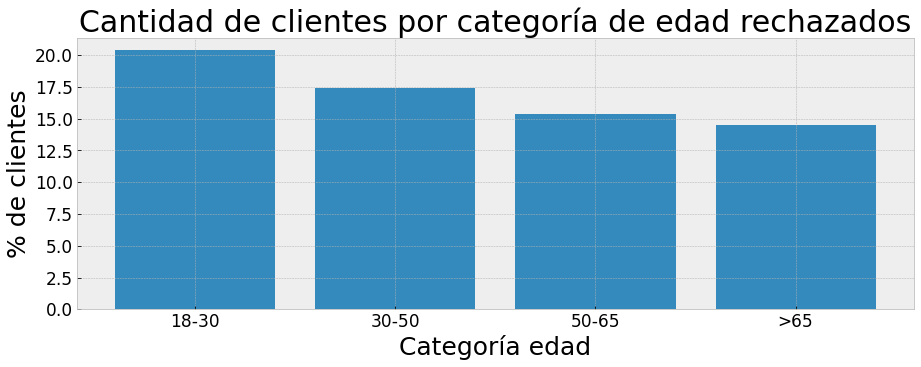

In [72]:
#Calculo porcentual de clientes con cliente aceptados, discriminado por rango de edad de los clientes

lista_ordenado = ['18-30','30-50','50-65','>65']

df_story_count_categoria_edad = df_story.groupby(['categoria_edad']).agg(id_count = ('id', 'count'),).reset_index()
df_story_count_categoria_edad

df_story_categoria_edad = df_story.loc[(df_story['cliente_aceptado']==0)]
df_story_categoria_edad = df_story_categoria_edad.groupby(['categoria_edad']).agg(id_count = ('id', 'count'),).reset_index()

df_story_categoria_edad

df_story_X = pd.merge(df_story_count_categoria_edad,df_story_categoria_edad, on = 'categoria_edad')


division = []
for index, row in df_story_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_story_X['division'] = division

df_story_X = df_story_X.set_index('categoria_edad').loc[lista_ordenado].reset_index()

#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes rechazados
x1 = df_story_X.categoria_edad
y1 = df_story_X.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por categoría de edad rechazados')
axes.set_xlabel('Categoría edad')
axes.set_ylabel('% de clientes')
axes.title.set_size(30)
axes.xaxis.label.set_size(25)
axes.yaxis.label.set_size(25)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()


De esta gráfica se puede observar claramente que a medida que aumenta la edad de los clientes disminuyen los rechazos. 

#### Género de los clientes rechazados

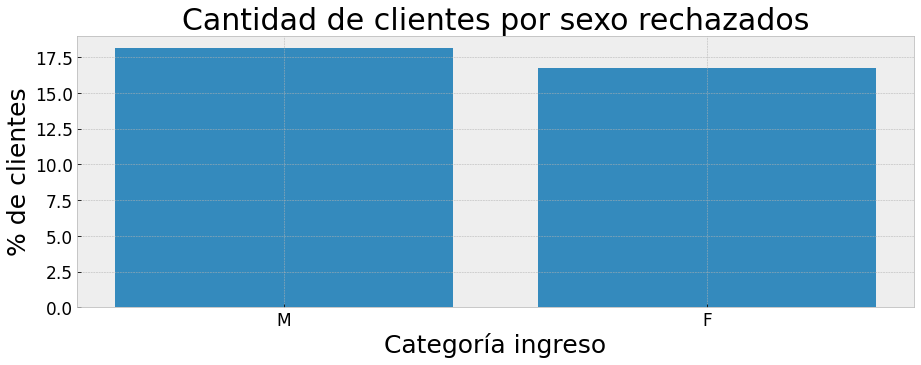

In [73]:
#Calculo porcentual de clientes con cliente aceptados, discriminado por rango de ingreso de los clientes

lista_ordenado = ['M','F']

df_story_count_code_gender = df_story.groupby(['code_gender']).agg(id_count = ('id', 'count'),).reset_index()
df_story_count_code_gender

df_story_code_gender = df_story.loc[(df_story['cliente_aceptado']==0)]
df_story_code_gender = df_story_code_gender.groupby(['code_gender']).agg(id_count = ('id', 'count'),).reset_index()

df_story_code_gender

df_story_X = pd.merge(df_story_count_code_gender,df_story_code_gender, on = 'code_gender')


division = []
for index, row in df_story_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_story_X['division'] = division

df_story_X = df_story_X.set_index('code_gender').loc[lista_ordenado].reset_index()

#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes aceptados
x1 = df_story_X.code_gender
y1 = df_story_X.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por sexo rechazados')
axes.set_xlabel('Categoría ingreso')
axes.set_ylabel('% de clientes')
axes.title.set_size(30)
axes.xaxis.label.set_size(25)
axes.yaxis.label.set_size(25)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

Del gráfico se puede observar que los clientes del género masculino son los que mayores rechazos reciben.

#### Clientes rechazados por nivel de educación 

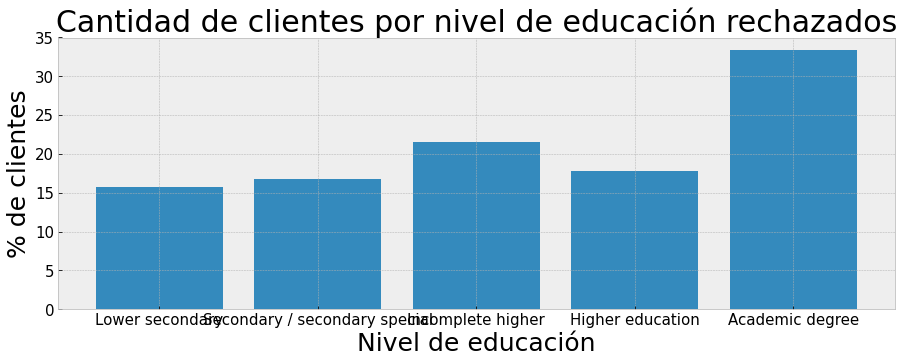

In [74]:
#Calculo porcentual de clientes con cliente aceptados, discriminado por nivel de educación

lista_ordenado = ['Lower secondary','Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

df_story_count_name_education_type = df_story.groupby(['name_education_type']).agg(id_count = ('id', 'count'),).reset_index()
df_story_count_name_education_type

df_story_name_education_type = df_story.loc[(df_story['cliente_aceptado']==0)]
df_story_name_education_type = df_story_name_education_type.groupby(['name_education_type']).agg(id_count = ('id', 'count'),).reset_index()

df_story_name_education_type

df_story_X = pd.merge(df_story_count_name_education_type,df_story_name_education_type, on = 'name_education_type')


division = []
for index, row in df_story_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_story_X['division'] = division

df_story_X = df_story_X.set_index('name_education_type').loc[lista_ordenado].reset_index()

#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes aceptados
x1 = df_story_X.name_education_type
y1 = df_story_X.division

fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por nivel de educación rechazados')
axes.set_xlabel('Nivel de educación')
axes.set_ylabel('% de clientes')
axes.title.set_size(30)
axes.xaxis.label.set_size(25)
axes.yaxis.label.set_size(25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


Del gráfico se observa que a mayor nivel de educación aumentan los clientes rechazados. Por otro lado, se debe destacar que en la categoría “Academic degree” se observa un alto nivel de rechazados porque el tamaño de la muestra es pequeño y al no ser representativo, no se debería obtener conclusiones de esta categoría.

##### Finalmente, debido a que la variable objetivo es una variable categórica, luego de este análisis exploratorio, se recomienda implementar el uso de modelos del tipo categórico. 


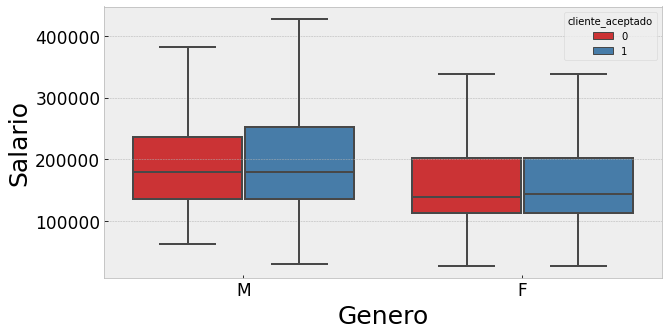

In [75]:
#Ingreso por status

fig_dims = (10,5)
fix, ax = plt.subplots(figsize = fig_dims)
b1 = sns.boxplot(data = df_story, x = 'code_gender', y = 'amt_income_total',hue='cliente_aceptado', palette = 'Set1', showfliers = False)
b1.set_xlabel('Genero', fontsize = 25)
b1.set_ylabel('Salario', fontsize = 25)
b1.tick_params(labelsize = 17)




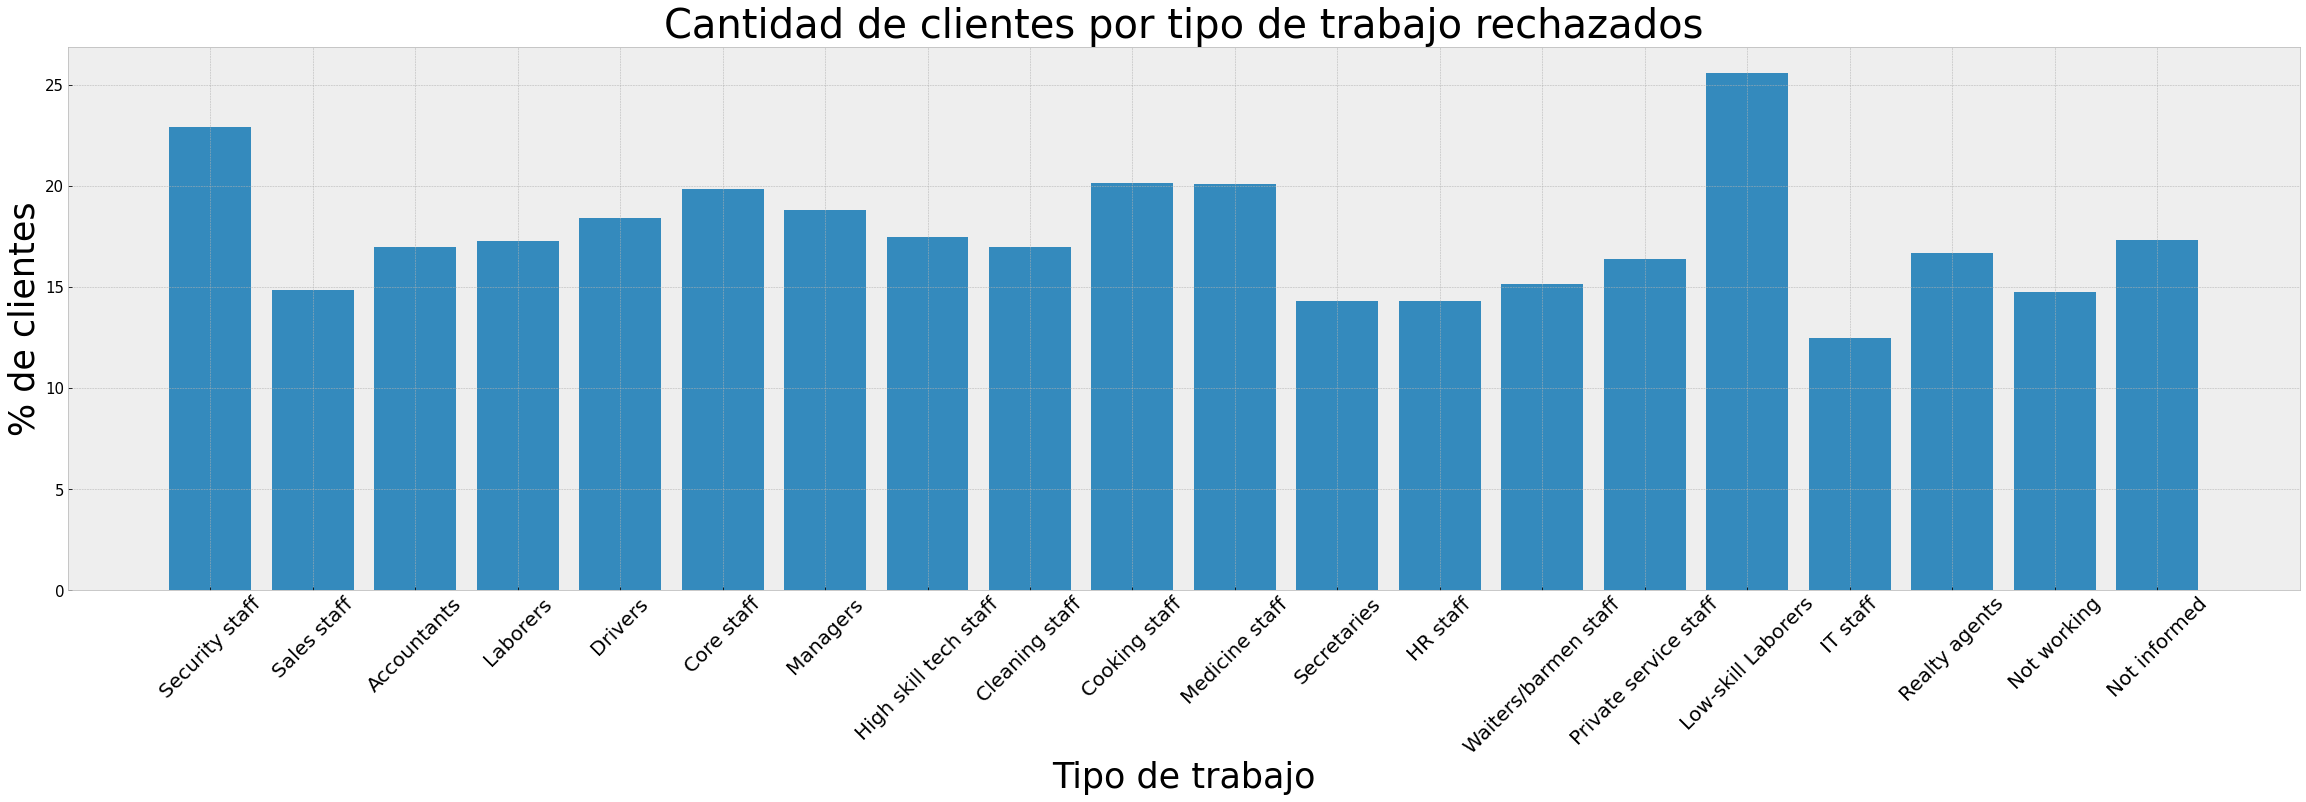

In [76]:
#¿Qué tipo de trabajo tienen los clientes rechazados?

#Calculo porcentual de clientes con cliente aceptados, discriminado por nivel de educación

lista_ordenado = ['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Drivers', 'Core staff', 'Managers', 'High skill tech staff',
       'Cleaning staff', 'Cooking staff', 'Medicine staff', 'Secretaries',
       'HR staff', 'Waiters/barmen staff', 'Private service staff',
       'Low-skill Laborers', 'IT staff', 'Realty agents', 'Not working',
       'Not informed']

df_story_count_occupation_type = df_story.groupby(['occupation_type']).agg(id_count = ('id', 'count'),).reset_index()
df_story_count_occupation_type

df_story_occupation_type = df_story.loc[(df_story['cliente_aceptado']==0)]
df_story_occupation_type = df_story_occupation_type.groupby(['occupation_type']).agg(id_count = ('id', 'count'),).reset_index()

df_story_occupation_type

df_story_X = pd.merge(df_story_count_occupation_type,df_story_occupation_type, on = 'occupation_type')


division = []
for index, row in df_story_X.iterrows():  
    a = row['id_count_x']
    b = abs(row['id_count_y'])
    aux = (b / a)*100
    division.append(aux)
    
df_story_X['division'] = division

df_story_X = df_story_X.set_index('occupation_type').loc[lista_ordenado].reset_index()

#Gráfico de barras que muestra porcentualmente el rango de ingreso de los clientes aceptados
x1 = df_story_X.occupation_type
y1 = df_story_X.division


fig, ax = plt.subplots()
ax.bar(x1,y1)

#Formato del gráfico

axes = plt.gca()
axes.set_title('Cantidad de clientes por tipo de trabajo rechazados')
axes.set_xlabel('Tipo de trabajo')
axes.set_ylabel('% de clientes')
axes.title.set_size(40)
axes.xaxis.label.set_size(35)
axes.yaxis.label.set_size(35)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(rotation=45)
plt.grid(True)

fig.set_size_inches(40, 10)
plt.show()




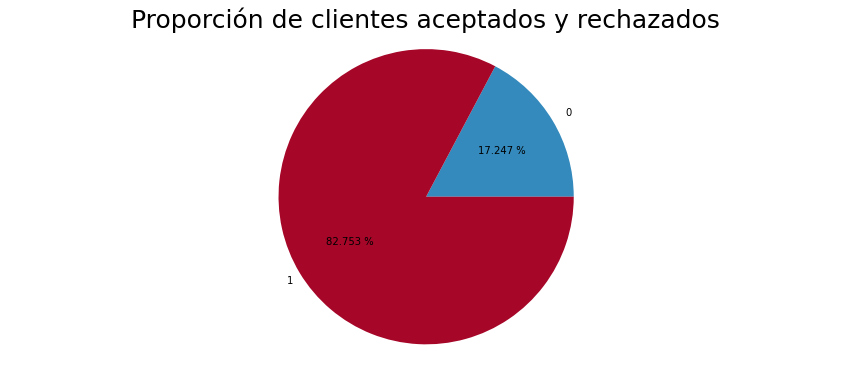

In [77]:
#Agrupo los clientes por tipo de trabajo
df_clientes = df_story.groupby(['cliente_aceptado']).agg(id_count = ('id', 'count'),).reset_index()

#Gráfico cantidad de clientes por tipo de trabajo
fig,ax = plt.subplots(figsize =(15, 6))
plt.pie(df_clientes.id_count, labels=df_clientes.cliente_aceptado, autopct="%1.3f %%",radius=0.5, center=(4, 4))
plt.axis("equal")
axes = plt.gca()
axes.set_title('Proporción de clientes aceptados y rechazados')
axes.title.set_size(25)




plt.show()

## PRIMERA PRUEBA DE ALGORITMOS

En este apartado se procederá a realiazar 4 modelos de algoritmos que permitan determinar si un cliente debe ser aceptado o rechazado para otorgar un crédito.

In [78]:
#Realizo un one hot encoding para las variables categoricas no ordinales 
#creating instance of one-hot-encoder
encoder = SklearnOneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)

#perform one-hot encoding on 'team' column 
encoder_df = encoder.fit_transform(df[['code_gender', 'flag_own_car', 'flag_own_realty','name_income_type',
                'name_housing_type','flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email', 'occupation_type']])
column_name = encoder.get_feature_names_out(['code_gender', 'flag_own_car', 'flag_own_realty','name_income_type',
                'name_housing_type','flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email', 'occupation_type'])
one_hot_encoded_frame = pd.DataFrame(encoder_df, columns=column_name)# #merge one-hot encoded columns back with original DataFrame
df = df.join(one_hot_encoded_frame)

df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not informed,occupation_type_Not working,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5008844,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,5100118,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7435,5105801,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,5145760,F,Y,N,0,135000.0,Working,Higher education,Married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Realizo un ordinal encoding para las variables categoricas ordinales

category_ordinal_col = ['name_education_type','categoria_sueldo']

for col in category_ordinal_col: 
    b, c = np.unique(df[col], return_inverse=True) 
    df[col] = c

In [80]:
#Veo las columnas del dataframe
df.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members', 'data_day_x',
       'birthday', 'months_balance', 'status', 'months_balance_date',
       'edad_dias', 'edad', 'categoria_sueldo', 'amt_income_total_outliers',
       'cnt_children_outliers', 'cnt_fam_members_outliers', 'cliente_aceptado',
       'code_gender_M', 'flag_own_car_Y', 'flag_own_realty_Y',
       'name_income_type_Pensioner', 'name_income_type_State servant',
       'name_income_type_Student', 'name_income_type_Working',
       'name_housing_type_House / apartment',
       'name_housing_type_Municipal apartment',
       'name_housing_type_Office apartment',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents',
 

In [81]:
#Elimino las variables que no aportan nada al modelo
df_aux = df.drop(columns=['id', 'code_gender', 'flag_own_car', 'flag_own_realty','amt_income_total','name_income_type',
       'name_family_status', 'name_housing_type', 'days_birth','flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type','data_day_x',
       'birthday', 'months_balance', 'status',
       'edad_dias','amt_income_total_outliers',
       'cnt_children_outliers', 'cnt_fam_members_outliers'])
df_aux

,cnt_children,name_education_type,days_employed,cnt_fam_members,months_balance_date,edad,categoria_sueldo,cliente_aceptado,code_gender_M,flag_own_car_Y,...,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not informed,occupation_type_Not working,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,0,4,-1134,2,2020-03-24,58,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,4,-3051,1,2020-03-24,52,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,-769,2,2020-03-24,46,6,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,-1163,5,2019-07-24,34,6,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,-4450,2,2019-04-24,56,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,0,4,-673,2,2019-07-24,55,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7435,0,4,-5782,2,2017-11-24,53,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,0,1,-4834,2,2019-11-24,42,1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,0,4,-2694,2,2019-04-24,43,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Veo los tipos de datos del modelo
df_aux.dtypes

cnt_children                                      int64
name_education_type                               int64
days_employed                                     int64
cnt_fam_members                                   int64
months_balance_date                      datetime64[ns]
edad                                              int32
categoria_sueldo                                  int64
cliente_aceptado                                float64
code_gender_M                                   float64
flag_own_car_Y                                  float64
flag_own_realty_Y                               float64
name_income_type_Pensioner                      float64
name_income_type_State servant                  float64
name_income_type_Student                        float64
name_income_type_Working                        float64
name_housing_type_House / apartment             float64
name_housing_type_Municipal apartment           float64
name_housing_type_Office apartment              

In [83]:
#Veo la descripción de las variables del dataframe
df_aux.describe()

,cnt_children,name_education_type,days_employed,cnt_fam_members,edad,categoria_sueldo,cliente_aceptado,code_gender_M,flag_own_car_Y,flag_own_realty_Y,...,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Not informed,occupation_type_Not working,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
count,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,...,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000
mean,0.419680,3.152574,62111.581395,2.177443,43.357037,5.366044,0.827531,0.349375,0.363759,0.673612,...,0.079446,0.030112,0.137250,0.175696,0.008200,0.001613,0.099476,0.004705,0.017610,0.004436
std,0.773812,1.313458,139973.544219,0.936386,11.650437,5.171985,0.377813,0.476805,0.481113,0.468923,...,0.270452,0.170906,0.344134,0.380587,0.090188,0.040134,0.299320,0.068436,0.131537,0.066460
min,0.000000,0.000000,-15713.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-2967.000000,2.000000,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,-1376.000000,2.000000,42.000000,4.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,-340.500000,3.000000,53.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,4.000000,365243.000000,20.000000,68.000000,17.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#Normalizo las variables para que todas esten entre 0 y 1
MM = MinMaxScaler()
df_aux[['cnt_children','name_education_type','days_employed','cnt_fam_members','edad',
     'categoria_sueldo']]= MM.fit_transform(df_aux[['cnt_children','name_education_type','days_employed',
                                                 'cnt_fam_members','edad','categoria_sueldo']])

In [85]:
#Veo las columnas de mi dataframe
df_aux.columns

Index(['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'months_balance_date', 'edad', 'categoria_sueldo',
       'cliente_aceptado', 'code_gender_M', 'flag_own_car_Y',
       'flag_own_realty_Y', 'name_income_type_Pensioner',
       'name_income_type_State servant', 'name_income_type_Student',
       'name_income_type_Working', 'name_housing_type_House / apartment',
       'name_housing_type_Municipal apartment',
       'name_housing_type_Office apartment',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents',
       'flag_work_phone_True', 'flag_phone_True', 'flag_email_True',
       'occupation_type_Cleaning staff', 'occupation_type_Cooking staff',
       'occupation_type_Core staff', 'occupation_type_Drivers',
       'occupation_type_HR staff', 'occupation_type_High skill tech staff',
       'occupation_type_IT staff', 'occupation_type_Laborers',
       'occupation_type_Low-skill Laborers', 'occupation_type_Managers',
      

In [86]:
#Establesco las variables independientes y objetivo de mi modelo
x = df_aux[['cnt_children','name_education_type',
       'days_employed', 'cnt_fam_members', 'edad', 'categoria_sueldo',
       'code_gender_M', 'flag_own_car_Y',
       'flag_own_realty_Y', 'name_income_type_Pensioner',
       'name_income_type_State servant', 'name_income_type_Student',
       'name_income_type_Working', 'name_housing_type_House / apartment',
       'name_housing_type_Municipal apartment',
       'name_housing_type_Office apartment',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents',
       'flag_work_phone_True', 'flag_phone_True', 'flag_email_True',
       'occupation_type_Cleaning staff', 'occupation_type_Cooking staff',
       'occupation_type_Core staff', 'occupation_type_Drivers',
       'occupation_type_HR staff', 'occupation_type_High skill tech staff',
       'occupation_type_IT staff', 'occupation_type_Laborers',
       'occupation_type_Low-skill Laborers', 'occupation_type_Managers',
       'occupation_type_Medicine staff', 'occupation_type_Not informed',
       'occupation_type_Not working', 'occupation_type_Private service staff',
       'occupation_type_Realty agents', 'occupation_type_Sales staff',
       'occupation_type_Secretaries', 'occupation_type_Security staff',
       'occupation_type_Waiters/barmen staff']] # variables independientes
y = df_aux['cliente_aceptado'] # variable objetivo

In [87]:
# Identificar el balanceo de la variable objetivo
df2 = df_aux
df2 = df2.drop(['months_balance_date'],axis=1)
df2['cliente_aceptado'].value_counts(normalize=True)

1.0    0.827531
0.0    0.172469
Name: cliente_aceptado, dtype: float64

In [88]:
#PASO 1: dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [89]:
#Veo el tamaño de los dataframes de entrenamiento y test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5207, 40), (2232, 40), (5207,), (2232,))

In [90]:
#Veo como esta balanceada la variable objetivo en el dataframe de entrenamiento
y_train.value_counts(normalize=True)

1.0    0.82754
0.0    0.17246
Name: cliente_aceptado, dtype: float64

In [91]:
#Veo como esta balanceada la variable objetivo en el dataframe de test
y_test.value_counts(normalize=True)

1.0    0.827509
0.0    0.172491
Name: cliente_aceptado, dtype: float64

### KNN

In [92]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# Paso 1: Crear instancia (u objeto) con modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Paso 2: Entrenamiento del modelo
knn.fit(x_train, y_train)

# Paso 3: Hacer las predicciones sobre los datos desconocidos
y_test_pred = knn.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7836021505376344
CPU times: total: 1.34 s
Wall time: 287 ms


#### Análisis de métricas KNN

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


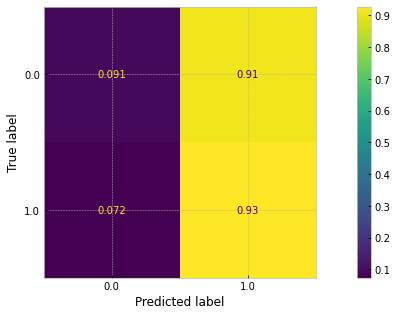

In [93]:
plot_confusion_matrix(knn, x_test, y_test, normalize='true')

In [94]:
#Analizo las métricas del modelo KNN
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.93
f1_score 0.88


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes aceptados, pero no es bueno para predecir los clientes que deben ser rechazados.

### Regresión logística

In [95]:
%%time
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(x,y)

# Paso 3
y_test_pred = regresion_logistica.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8301971326164874
CPU times: total: 500 ms
Wall time: 114 ms


#### Análisis de métricas regresión logística

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


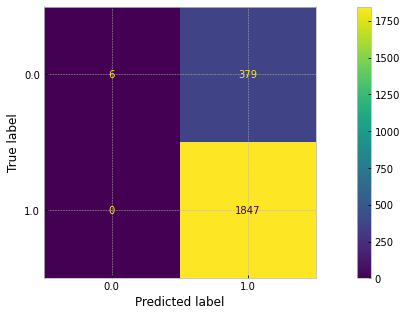

In [96]:
#Evaluo las métricas del modelo de regresión logística
plot_confusion_matrix(regresion_logistica, x_test, y_test)

In [97]:
y_train_pred = regresion_logistica.predict(x_train) #Prediccion en Train

y_test_pred = regresion_logistica.predict(x_test) #Prediccion en Test

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03       385
         1.0       0.83      1.00      0.91      1847

    accuracy                           0.83      2232
   macro avg       0.91      0.51      0.47      2232
weighted avg       0.86      0.83      0.76      2232

[[   6  379]
 [   0 1847]]


In [98]:
#Evaluo las métricas del modelo de regresión logística
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.83
recall 1.0
f1_score 0.91


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes aceptados, pero no es bueno para predecir los clientes que deben ser rechazados.

### Random Forest

In [99]:
%%time 
from sklearn.ensemble import RandomForestClassifier
# Paso 1
random_forest = RandomForestClassifier(random_state=11, n_jobs=6)
# Paso 2
random_forest.fit(x_train, y_train)
# Paso 3
y_test_pred = random_forest.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8248207885304659
CPU times: total: 1.8 s
Wall time: 428 ms


#### Análisis de métricas random forest

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


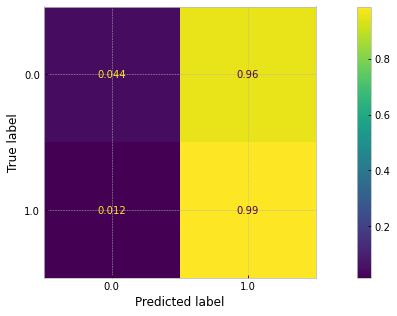

In [100]:
plot_confusion_matrix(random_forest, x_test, y_test, normalize='true')

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


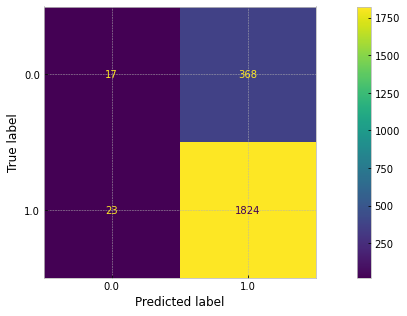

In [101]:
plot_confusion_matrix(random_forest, x_test, y_test)

In [102]:
y_train_pred = random_forest.predict(x_train) #Prediccion en Train

y_test_pred = random_forest.predict(x_test) #Prediccion en Test

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.04      0.08       385
         1.0       0.83      0.99      0.90      1847

    accuracy                           0.82      2232
   macro avg       0.63      0.52      0.49      2232
weighted avg       0.76      0.82      0.76      2232

[[  17  368]
 [  23 1824]]


In [103]:
#Evaluo las métricas del modelo de random forest
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.99
f1_score 0.9


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes aceptados, pero no es bueno para predecir los clientes que deben ser rechazados.

Finalmente, los resultados obtenidos durante la primera prueba de algoritmos no fueron buenos, debido a que el dataset se encuentra desbalanceado.

### Reducción de variables para aplicar nuevos modelos

En este apartado se procede a reducir las variables del dataframe que menos influyeron en el modelado de Random Forest, para correrlas luego en una Regresión Logística y analizar luego las métricas.

In [104]:
#Veo como influyen las variables en el modelo con el datafreme original de random forest
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de características:")

for f in range(x_train.shape[1]):
    print("Característica %s (%f)" % (x.columns[indices[f]], importances[indices[f]]))

Importancia de características:
Característica edad (0.197710)
Característica days_employed (0.182147)
Característica categoria_sueldo (0.145538)
Característica cnt_fam_members (0.052598)
Característica name_education_type (0.040737)
Característica flag_own_car_Y (0.031451)
Característica cnt_children (0.030838)
Característica flag_phone_True (0.028899)
Característica name_income_type_Working (0.027161)
Característica flag_own_realty_Y (0.026985)
Característica code_gender_M (0.025996)
Característica flag_work_phone_True (0.024282)
Característica occupation_type_Not informed (0.015655)
Característica occupation_type_Laborers (0.015564)
Característica flag_email_True (0.015242)
Característica occupation_type_Core staff (0.012257)
Característica name_housing_type_House / apartment (0.011527)
Característica name_income_type_State servant (0.011442)
Característica occupation_type_Managers (0.011303)
Característica occupation_type_Sales staff (0.010724)
Característica occupation_type_Driver

In [105]:
#Creo un nuevo dataframe en donde solo tomo las variables que más explican a mi modelo
df_reduccion_variables = df[['edad','days_employed','categoria_sueldo','cnt_fam_members','name_education_type','code_gender_M','flag_phone_True','flag_own_realty_Y','flag_own_car_Y','cnt_children','name_income_type_Pensioner',
                            'flag_work_phone_True','name_income_type_Working','flag_email_True','occupation_type_Core staff','occupation_type_Laborers',
                            'occupation_type_Not informed','occupation_type_Not working','cliente_aceptado']]

In [106]:
#Establesco las variables independientes y objetivo de mi modelo
x = df_reduccion_variables[['edad', 'days_employed', 'categoria_sueldo',
       'cnt_fam_members', 'name_education_type', 'code_gender_M',
       'flag_phone_True', 'flag_own_realty_Y', 'flag_own_car_Y',
       'cnt_children', 'name_income_type_Pensioner', 'flag_work_phone_True',
       'name_income_type_Working', 'flag_email_True',
       'occupation_type_Core staff', 'occupation_type_Laborers',
       'occupation_type_Not informed', 'occupation_type_Not working']] # variables independientes
y = df_reduccion_variables['cliente_aceptado'] # variable objetivo

In [107]:
# Identificar el balanceo de la variable objetivo
df_reduccion_variables['cliente_aceptado'].value_counts(normalize=True)

1.0    0.827531
0.0    0.172469
Name: cliente_aceptado, dtype: float64

In [108]:
#PASO 1: dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [109]:
#Veo como esta balanceada la variable objetivo en el dataframe de entrenamiento
y_train.value_counts(normalize=True)

1.0    0.82754
0.0    0.17246
Name: cliente_aceptado, dtype: float64

In [110]:
#Veo como esta balanceada la variable objetivo en el dataframe de test
y_test.value_counts(normalize=True)

1.0    0.827509
0.0    0.172491
Name: cliente_aceptado, dtype: float64

### Regresión logística (con reducción de variables)

In [111]:
%%time
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(x,y)

# Paso 3
y_test_pred = regresion_logistica.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8275089605734767
CPU times: total: 78.1 ms
Wall time: 33.9 ms


C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


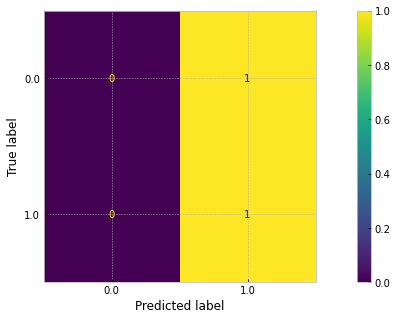

In [112]:
#Evaluo las métricas del modelo de random forest
plot_confusion_matrix(regresion_logistica, x_test, y_test, normalize='true')

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


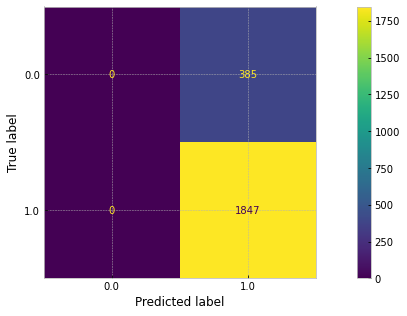

In [113]:
#Evaluo las métricas del modelo de random forest
plot_confusion_matrix(regresion_logistica, x_test, y_test)

In [114]:
#Evaluo las métricas del modelo de random forest
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.83
recall 1.0
f1_score 0.91


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes aceptados, pero no es bueno para predecir los clientes que deben ser rechazados.
Por otro lado, se puede observar que el modelo no obtuvo mejoras al reducir la cantidad de variables, sino que el accuracy empeoró.

## CONSUMO API

Se desarrolla en otro Notebook de Jupiter


## SEGUNDA PRUEBA DE ALGORITMOS

Luego de haber adquirido nuevas herramientas para optimizar modelos, se procede a reentrenar los mismos, con el objetivo de obtener mejores métricas resultantes.

### Ingenieria de variables

A continuación, se crearan nuevas variables que pueden resultar útiles para entrenar el modelo. 
Por otro lado, se debe destacar las variables categoría sueldo y categoría edad también forman parte del proceso de ingeniería de variables, a pesar de que fueron creadas anteriormente para poder realizar gráficos de interés.

In [115]:
#categorias sin hijos - con hijos
df_story['tiene_hijos'] = 0

#Cambio las categorías para que queden con el formato que quiero
df_story.loc[(df_story['cnt_children']<= 0),'tiene_hijos']= 0
df_story.loc[(df_story['cnt_children'] > 0),'tiene_hijos']= 1

In [116]:
#creo la categoria vive_solo
df_story['vive_solo'] = 0
df_story.loc[(df_story['cnt_fam_members']==1),'vive_solo']= 1
df_story.loc[(df_story['cnt_fam_members']> 1),'vive_solo']= 0

In [117]:
#Alquila/no alquila
df_story['alquila'] = 1
df_story.loc[(df_story['flag_own_realty']==1),'alquila']= 0
df_story.loc[(df_story['name_housing_type']=='With parents'),'alquila']= 0

In [118]:
#Categoria de desempleos/empleos
df_story['trabajando'] = 0
df_story.loc[(df_story['days_employed']<=0),'trabajando']= 1
df_story.loc[(df_story['days_employed']> 0),'trabajando']= 0

### Procesos de Encoding

In [119]:
#Copia del dataframe df_story para usar más adelante en MCA
df_story_mca = df_story.copy()

In [120]:
#Se realiza un Label encoding para las variables que tienen más de 3 categorías
lista_label = ['name_income_type','name_housing_type', 'occupation_type', 'categoria_edad', 'name_family_status']
lista_nombres = ['name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label']

lab = LabelEncoder()

for i in range(len(lista_label)):
    df_story[lista_nombres[i]] = lab.fit_transform(df_story[lista_label[i]])

In [121]:
#Realizo un one hot encoding para las variables categoricas no ordinales 
#creating instance of one-hot-encoder
encoder = SklearnOneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)

#perform one-hot encoding on 'team' column 
encoder_df = encoder.fit_transform(df_story[['code_gender', 'flag_own_car', 'flag_own_realty',
                'flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email']])
column_name = encoder.get_feature_names_out(['code_gender', 'flag_own_car', 'flag_own_realty',
                'flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email'])
one_hot_encoded_frame = pd.DataFrame(encoder_df, columns=column_name)# #merge one-hot encoded columns back with original DataFrame
df_story = df_story.join(one_hot_encoded_frame)

In [122]:
#Realizo un ordinal encoding para las variables categoricas ordinales

category_ordinal_col = ['name_education_type','categoria_sueldo']

for col in category_ordinal_col: 
    b, c = np.unique(df_story[col], return_inverse=True) 
    df_story[col] = c

In [123]:
#Elimino las variables que no aportan nada al modelo
df_entrenamiento = df_story.drop(columns=['Unnamed: 0','anio_mes', 'id', 'code_gender', 'flag_own_car', 'flag_own_realty','amt_income_total','name_income_type',
       'name_family_status', 'name_housing_type', 'days_birth','flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type','data_day_x',
       'birthday', 'months_balance', 'status','months_balance_date','categoria_edad',
       'edad_dias','amt_income_total_outliers','edad',
       'cnt_children_outliers', 'cnt_fam_members_outliers'], errors='ignore')
df_entrenamiento

,cnt_children,name_education_type,days_employed,cnt_fam_members,categoria_sueldo,cliente_aceptado,tiene_hijos,vive_solo,alquila,trabajando,...,name_housing_type_label,occupation_type_label,categoria_edad_label,name_family_status_label,code_gender_M,flag_own_car_Y,flag_own_realty_Y,flag_work_phone_True,flag_phone_True,flag_email_True
0,0,4,-1134,2,0,1,0,0,1,1,...,1,18,2,0,1.0,1.0,1.0,0.0,0.0,0.0
1,0,4,-3051,1,6,1,0,1,1,1,...,1,16,2,2,0.0,0.0,1.0,0.0,1.0,1.0
2,0,1,-769,2,6,1,0,0,1,1,...,1,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,4,-1163,5,6,1,1,0,1,1,...,1,8,1,0,1.0,1.0,1.0,0.0,0.0,0.0
4,0,4,-4450,2,0,1,0,0,1,1,...,1,4,2,0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,0,4,-673,2,0,0,0,0,1,1,...,1,12,2,0,0.0,1.0,1.0,0.0,1.0,0.0
7435,0,4,-5782,2,0,0,0,0,1,1,...,1,12,2,2,0.0,0.0,0.0,0.0,1.0,0.0
7436,0,1,-4834,2,1,0,0,0,1,1,...,1,12,1,0,0.0,1.0,0.0,0.0,0.0,1.0
7437,0,4,-2694,2,0,0,0,0,1,1,...,1,12,1,0,0.0,0.0,1.0,1.0,1.0,0.0


In [124]:
#Normalizo las variables para que todas esten entre 0 y 1
MM = MinMaxScaler()
df_entrenamiento[['cnt_children','name_education_type','cnt_fam_members','name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label',
     'categoria_sueldo']]= MM.fit_transform(df_entrenamiento[['cnt_children','name_education_type','cnt_fam_members','name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label', 
     'categoria_sueldo']])

In [125]:
#Establesco las variables independientes y objetivo de mi modelo
x = df_entrenamiento[['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label', 'code_gender_M',
       'flag_own_car_Y', 'flag_own_realty_Y', 'flag_work_phone_True',
       'flag_phone_True', 'flag_email_True', 'name_family_status_label']]

y = df_entrenamiento['cliente_aceptado'] #variable objetivo

In [126]:
# Identificar el balanceo de la variable objetivo
df_entrenamiento['cliente_aceptado'].value_counts(normalize=True)

1    0.827531
0    0.172469
Name: cliente_aceptado, dtype: float64

In [127]:
#PASO 1: dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [128]:
#Veo el tamaño de los dataframes de entrenamiento y test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5207, 20), (2232, 20), (5207,), (2232,))

In [129]:
#Veo como esta balanceada la variable objetivo en el dataframe de entrenamiento
y_train.value_counts(normalize=True)

1    0.82754
0    0.17246
Name: cliente_aceptado, dtype: float64

In [130]:
#Veo como esta balanceada la variable objetivo en el dataframe de test
y_test.value_counts(normalize=True)

1    0.827509
0    0.172491
Name: cliente_aceptado, dtype: float64

### Regresión logística

In [131]:
%%time
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(x,y)

# Paso 3
y_test_pred = regresion_logistica.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.2992831541218638
CPU times: total: 15.6 ms
Wall time: 20.9 ms


#### Análisis de métricas regresión logística

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


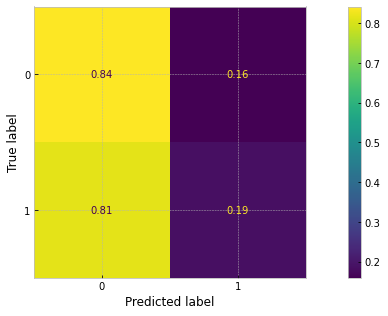

In [132]:
#Evaluo las métricas del modelo de regresión logística
plot_confusion_matrix(regresion_logistica, x_test, y_test, normalize='true')

In [133]:
#Evaluo las métricas del modelo de regresión logística
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.85
recall 0.19
f1_score 0.31


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes rechazados, pero no es bueno para predecir los clientes que deben ser aceptados.

### Random Forest

In [134]:
%%time 
from sklearn.ensemble import RandomForestClassifier
# Paso 1
random_forest = RandomForestClassifier(random_state=11, n_jobs=6)
# Paso 2
random_forest.fit(x_train, y_train)
# Paso 3
y_test_pred = random_forest.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8239247311827957
CPU times: total: 1.39 s
Wall time: 441 ms


#### Análisis de métricas random forest

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


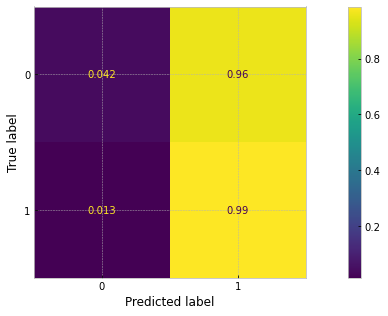

In [135]:
#Evaluo las métricas del modelo de random forest
plot_confusion_matrix(random_forest, x_test, y_test, normalize='true')

In [136]:
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.99
f1_score 0.9


Como se puede observar en la matriz de confusión y métricas calculadas, el modelo es bueno prediciendo los clientes aceptados, pero no es bueno para predecir los clientes que deben ser rechazados.

### SVC

Se probaron modelos de SVC, pero los resultados obtenidos no fueron mejores que con los modelos de Random Forest y Regresión Logística y a su vez, el procesamiento computacional para el entrenamiento de este tipo de algoritmos es muy grande (más de 12 horas) por lo que se decide quitar del Notebook. En el informe se pueden observar los resultados obtenidos.

## TERCER PRUEBA DE ALGORITMOS

En este apartado se vuelven a probar los modelos de Random Forest y Regresión Lineal, donde previamente se aplica la técnica SMOTE para balancear los datos y luego se procede a entrenar los modelos afinando sus hiperparámetros.

### Balanceo de datos (SMOTE)

In [137]:
from imblearn.over_sampling import SMOTE

#Establesco las variables independientes y objetivo de mi modelo
x = df_entrenamiento[['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label', 'code_gender_M',
       'flag_own_car_Y', 'flag_own_realty_Y', 'flag_work_phone_True',
       'flag_phone_True', 'flag_email_True', 'name_family_status_label']]

y = df_entrenamiento['cliente_aceptado'] #variable objetivo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

#Datos de entrenamiento (con SMOTE)
print(f"Tanaño de x antes de SMOTE: {x_train.shape}")
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train,y_train)

print(f"Tanaño de x luego de SMOTE: {x_train.shape}")
print(f"Balanceo de las clases: {y_train.value_counts(normalize=True)*100}")

Tanaño de x antes de SMOTE: (5579, 20)
Tanaño de x luego de SMOTE: (9234, 20)
Balanceo de las clases: 1    50.0
0    50.0
Name: cliente_aceptado, dtype: float64


In [186]:
y_test.value_counts()

1    1539
0     321
Name: cliente_aceptado, dtype: int64

### Random Forest (Con afinamiento de hiperparametros )

In [138]:
# Definir la grilla de los parametros, cada combinación es un modelo adicional
# Esto implica que entre más exahusiva sea la busqueda el tiempo de entrenamiento será mayor

params_grid = {'n_estimators': [512, 1024, 2048],
              'criterion':['entropy','gini'],
               #'max_depth': [3,4,5],
              'min_samples_split': [2,5,10,20],
              'min_samples_leaf': [4,5,6],
              'max_features': [0.1, 0.5, 1.0]
              }

In [139]:
%%time 
# Paso 1
clf = RandomForestClassifier()

HGS_RF = HalvingGridSearchCV(clf, params_grid, scoring="f1", factor=3, cv=5, n_jobs=-1, verbose=2)
HGS_RF.fit(x_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 114
max_resources_: 9234
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 114
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 1
n_candidates: 72
n_resources: 342
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 2
n_candidates: 24
n_resources: 1026
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 8
n_resources: 3078
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 3
n_resources: 9234
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 39.1 s
Wall time: 19min 9s


HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['entropy', 'gini'],
                                'max_features': [0.1, 0.5, 1.0],
                                'min_samples_leaf': [4, 5, 6],
                                'min_samples_split': [2, 5, 10, 20],
                                'n_estimators': [512, 1024, 2048]},
                    scoring='f1', verbose=2)

In [140]:
print("Mejores parametros", HGS_RF.best_params_)
print("Mejor Score CV", HGS_RF.best_score_)
print(f'f1-score del modelo = {round(f1_score(y_test, HGS_RF.predict(x_test)), 5)}')

Mejores parametros {'criterion': 'entropy', 'max_features': 1.0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 512}
Mejor Score CV 0.9150295480854338
f1-score del modelo = 0.90145


In [141]:
resultados = pd.concat([pd.DataFrame(HGS_RF.cv_results_['params']),
                        pd.DataFrame(HGS_RF.cv_results_['mean_test_score'], columns=['mean_test_score'])], axis=1)

maximo = resultados['mean_test_score'].max()

resultados.loc[resultados['mean_test_score'] == maximo]

,criterion,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_test_score
320,entropy,1.0,5,5,512,0.91503


C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


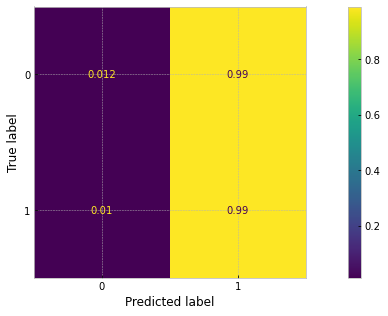

In [142]:
plot_confusion_matrix(HGS_RF, x_test, y_test, normalize='true')

In [143]:
y_train_pred = HGS_RF.predict(x_train) #Prediccion en Train

y_test_pred = HGS_RF.predict(x_test) #Prediccion en Test

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.20      0.01      0.02       321
           1       0.83      0.99      0.90      1539

    accuracy                           0.82      1860
   macro avg       0.51      0.50      0.46      1860
weighted avg       0.72      0.82      0.75      1860

[[   4  317]
 [  16 1523]]


C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


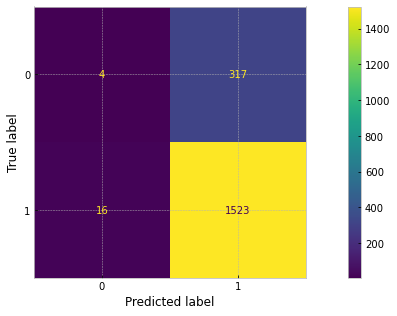

In [144]:
plot_confusion_matrix(HGS_RF, x_test, y_test)

In [145]:
y_test_pred = HGS_RF.predict(x_test)

print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))
print('accuracy', np.round(accuracy_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.99
f1_score 0.9
accuracy 0.82


### Regresión Logística (Con afinamiento de hiperparámetros)

In [176]:
from imblearn.over_sampling import SMOTE

#Establesco las variables independientes y objetivo de mi modelo
x = df_entrenamiento[['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label', 'code_gender_M',
       'flag_own_car_Y', 'flag_own_realty_Y', 'flag_work_phone_True',
       'flag_phone_True', 'flag_email_True', 'name_family_status_label']]

y = df_entrenamiento['cliente_aceptado'] #variable objetivo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

#Datos de entrenamiento (con SMOTE)
print(f"Tanaño de x antes de SMOTE: {x_train.shape}")
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train,y_train)
print(f"Tanaño de x luego de SMOTE: {x_train.shape}")
print(f"Balanceo de las clases: {y_train.value_counts(normalize=True)*100}")

Tanaño de x antes de SMOTE: (5579, 20)
Tanaño de x luego de SMOTE: (9234, 20)
Balanceo de las clases: 1    50.0
0    50.0
Name: cliente_aceptado, dtype: float64
Tanaño de x_test: (1860, 20)
Tanaño de y_test: (1860,)


In [147]:
%%time

params_grids = {
                'penalty': ['l2'],
                'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
                }

cfl = LogisticRegression(random_state=11)
RL_GHS = HalvingGridSearchCV(cfl, params_grids, scoring="f1", factor=3, cv=5, verbose=0)
RL_GHS.fit(x_train, y_train)

print("Mejores parametros", RL_GHS.best_params_)
print("Mejor Score CV", RL_GHS.best_score_)
print(f'f1-score del modelo = {round(f1_score(y_test, RL_GHS.predict(x_test)), 5)}')

C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\GUILLERMO\a

C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\s

Mejores parametros {'penalty': 'l2', 'solver': 'newton-cg'}
Mejor Score CV 0.645515841923193
f1-score del modelo = 0.72006
CPU times: total: 31.3 s
Wall time: 8.34 s


C:\Users\GUILLERMO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


#### Análisis de métricas regresión logística

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


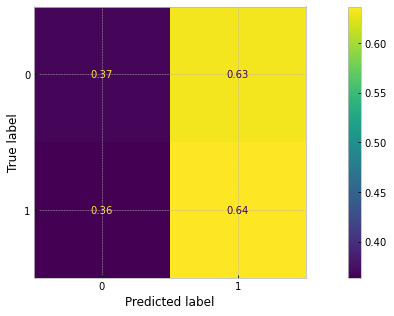

In [148]:
#Evaluo las métricas del modelo de regresión logística
plot_confusion_matrix(RL_GHS, x_test, y_test, normalize='true')

C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


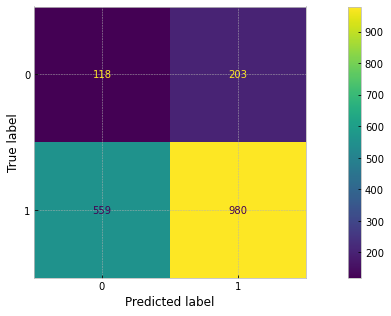

In [149]:
#Evaluo las métricas del modelo de regresión logística
plot_confusion_matrix(RL_GHS, x_test, y_test)

In [150]:
y_train_pred = RL_GHS.predict(x_train) #Prediccion en Train

y_test_pred = RL_GHS.predict(x_test) #Prediccion en Test

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.17      0.37      0.24       321
           1       0.83      0.64      0.72      1539

    accuracy                           0.59      1860
   macro avg       0.50      0.50      0.48      1860
weighted avg       0.72      0.59      0.64      1860

[[118 203]
 [559 980]]


In [151]:
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))
print('accuracy', np.round(accuracy_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.64
f1_score 0.72
accuracy 0.59


## CUARTA PRUEBA DE MODELOS

A continuación se entrenará nuevamente el modelo de Random Forest que es el que había mejores resultados en la iteración anterior, aplicando el método de reduccióin de variables MCA, con el objetivo de observar si existen mejoras en la métricas.

### MCA - Analisis de correspondencias Multiples 

In [152]:
#Se realiza un Label encoding para las variables que tienen más de 3 categorías
lista_label = ['name_income_type','name_housing_type', 'occupation_type', 'categoria_edad', 'name_family_status']
lista_nombres = ['name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label']

lab = LabelEncoder()

for i in range(len(lista_label)):
    df_story_mca[lista_nombres[i]] = lab.fit_transform(df_story_mca[lista_label[i]])

In [153]:
#Realizo un one hot encoding para las variables categoricas no ordinales 

encoder = SklearnOneHotEncoder(handle_unknown='ignore', sparse=False)

encoder_df = encoder.fit_transform(df_story_mca[['code_gender', 'flag_own_car', 'flag_own_realty',
                'flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email']])
column_name = encoder.get_feature_names_out(['code_gender', 'flag_own_car', 'flag_own_realty',
                'flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email'])
one_hot_encoded_frame = pd.DataFrame(encoder_df, columns=column_name)
df_story_mca = df_story_mca.join(one_hot_encoded_frame)

In [154]:
#Realizo un ordinal encoding para las variables categoricas ordinales

category_ordinal_col = ['name_education_type','categoria_sueldo']

for col in category_ordinal_col: 
    b, c = np.unique(df_story_mca[col], return_inverse=True) 
    df_story_mca[col] = c

In [155]:
df_story_mca.columns

Index(['anio_mes', 'Unnamed: 0', 'id', 'code_gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total',
       'name_income_type', 'name_education_type', 'name_family_status',
       'name_housing_type', 'days_birth', 'days_employed', 'flag_mobil',
       'flag_work_phone', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'data_day_x', 'birthday', 'months_balance', 'status',
       'months_balance_date', 'edad_dias', 'edad', 'categoria_sueldo',
       'amt_income_total_outliers', 'cnt_children_outliers',
       'cnt_fam_members_outliers', 'cliente_aceptado', 'categoria_edad',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label', 'code_gender_F', 'code_gender_M',
       'flag_own_car_N', 'flag_own_car_Y', 'flag_own_realty_N',
       'flag_own_realty_Y', 'flag_mobil_True', 'flag_wor

In [156]:
X = df_story_mca[[ 'code_gender_F', 'code_gender_M',
       'flag_own_car_N', 'flag_own_car_Y', 'flag_own_realty_N',
       'flag_own_realty_Y', 'flag_mobil_True', 'flag_work_phone_False',
       'flag_work_phone_True', 'flag_phone_False', 'flag_phone_True',
       'flag_email_False', 'flag_email_True']]

In [157]:
mca_ben = mca.MCA(X, ncols=13)

In [158]:
mca_ben.L

array([0.01858961, 0.01454386, 0.0057395 , 0.00353135, 0.00052119,
       0.00018539])

In [159]:
mca_ben.expl_var(greenacre=True)

array([0.12892417, 0.10086574, 0.03980503, 0.02449089, 0.00361457,
       0.00128571, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [160]:
data = np.array([mca_ben.L, mca_ben.expl_var(greenacre=True, N=6)*100]).T
tabla = pd.DataFrame(data, columns = ['cλ','%c'], index=range(1,7))
tabla

,cλ,%c
1,0.018590,12.892417
2,0.014544,10.086574
3,0.005739,3.980503
4,0.003531,2.449089
5,0.000521,0.361457
6,0.000185,0.128571


In [161]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 7)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=6).T
table3.loc[cos,   :] = mca_ben.cos_r(N=6).T
table3.loc[cont,  :] = mca_ben.cont_r(N=6).T * 1000

np.round(table3.astype(float), 2).T

Factor score                               Squared cosines              \
                1     2     3     4     5     6               1     2     3   
0            0.06 -0.21  0.02  0.04 -0.00  0.00            0.08  0.88  0.01   
1           -0.09  0.07 -0.26 -0.05  0.02  0.01            0.10  0.06  0.80   
2            0.28 -0.04 -0.27 -0.03 -0.02 -0.00            0.50  0.01  0.48   
3            0.06 -0.21  0.02  0.04 -0.00  0.00            0.08  0.88  0.01   
4            0.16 -0.11 -0.05  0.09  0.03  0.01            0.55  0.24  0.04   
...           ...   ...   ...   ...   ...   ...             ...   ...   ...   
7434         0.04  0.00 -0.05  0.09  0.04 -0.01            0.14  0.00  0.19   
7435         0.02  0.17  0.02 -0.03  0.05  0.01            0.01  0.89  0.01   
7436         0.00 -0.09 -0.14 -0.18  0.02 -0.02            0.00  0.15  0.30   
7437         0.08  0.23 -0.06  0.08 -0.02 -0.00            0.09  0.77  0.05   
7438         0.06 -0.21  0.02  0.04 -0.00  0.00            0.08  0.88  0.01   

                       Contributions x 1000                                
         4     5     6                    1     2     3     4     5     6  
0     0.03  0.00  0.00                 0.03  0.42  0.01  0.06  0.00  0.00  
1     0.03  0.01  0.00                 0.06  0.05  1.56  0.10  0.11  0.05  
2     0.00  0.00  0.00                 0.57  0.02  1.76  0.03  0.11  0.00  
3     0.03  0.00  0.00                 0.03  0.42  0.01  0.06  0.00  0.00  
4     0.15  0.02  0.00                 0.19  0.11  0.05  0.28  0.24  0.09  
...    ...   ...   ...                  ...   ...   ...   ...   ...   ...  
7434  0.52  0.14  0.01                 0.01  0.00  0.06  0.28  0.51  0.12  
7435  0.03  0.06  0.00                 0.00  0.27  0.01  0.03  0.52  0.08  
7436  0.54  0.01  0.01                 0.00  0.08  0.43  1.24  0.13  0.41  
7437  0.09  0.00  0.00                 0.04  0.49  0.08  0.23  0.08  0.00  
7438  0.03  0.00  0.00                 0.03  0.42  0.01  0.06  0.00  0.00  

[7439 rows x 18 columns]

In [162]:
resultado = table3.loc[fs].T
resultado.columns = ['C1', 'C2','C3','C4','C5','C6']
resultado

,C1,C2,C3,C4,C5,C6
0,0.063835,-0.21261,0.018377,0.038071,-0.003484,0.000811
1,-0.091413,0.070943,-0.258421,-0.05104,0.020725,0.008472
2,0.28125,-0.041783,-0.273941,-0.026917,-0.021012,-0.002516
3,0.063835,-0.21261,0.018377,0.038071,-0.003484,0.000811
4,0.163407,-0.108089,-0.045479,0.085118,0.03022,0.011271
...,...,...,...,...,...,...
7434,0.044273,0.002442,-0.051717,0.085039,0.044513,-0.012645
7435,0.017233,0.171982,0.021702,-0.029443,0.045108,0.010561
7436,0.002802,-0.094122,-0.135146,-0.180534,0.022338,-0.023883
7437,0.076975,0.230332,-0.059475,0.077048,-0.017653,-0.002448


In [163]:
resultado2 = resultado[['C1', 'C2','C3','C4']]

In [164]:
#Elimino las variables que no aportan nada al modelo
df_entrenamiento_mca = df_story.drop(columns=['Unnamed: 0','anio_mes', 'id', 'code_gender', 'flag_own_car', 'flag_own_realty','amt_income_total','name_income_type',
       'name_family_status', 'name_housing_type', 'days_birth','flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type','data_day_x',
       'birthday', 'months_balance', 'status','months_balance_date','categoria_edad',
       'edad_dias','amt_income_total_outliers','edad',
       'cnt_children_outliers', 'cnt_fam_members_outliers', 'code_gender_F', 'code_gender_M',
       'flag_own_car_N', 'flag_own_car_Y', 'flag_own_realty_N',
       'flag_own_realty_Y', 'flag_mobil_True', 'flag_work_phone_False',
       'flag_work_phone_True', 'flag_phone_False', 'flag_phone_True',
       'flag_email_False', 'flag_email_True'], errors='ignore')
df_entrenamiento_mca

,cnt_children,name_education_type,days_employed,cnt_fam_members,categoria_sueldo,cliente_aceptado,tiene_hijos,vive_solo,alquila,trabajando,name_income_type_label,name_housing_type_label,occupation_type_label,categoria_edad_label,name_family_status_label
0,0,4,-1134,2,0,1,0,0,1,1,4,1,18,2,0
1,0,4,-3051,1,6,1,0,1,1,1,0,1,16,2,2
2,0,1,-769,2,6,1,0,0,1,1,4,1,0,1,0
3,3,4,-1163,5,6,1,1,0,1,1,4,1,8,1,0
4,0,4,-4450,2,0,1,0,0,1,1,0,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,0,4,-673,2,0,0,0,0,1,1,1,1,12,2,0
7435,0,4,-5782,2,0,0,0,0,1,1,0,1,12,2,2
7436,0,1,-4834,2,1,0,0,0,1,1,4,1,12,1,0
7437,0,4,-2694,2,0,0,0,0,1,1,0,1,12,1,0


In [165]:
df_entrenamiento_mca.columns

Index(['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo', 'cliente_aceptado',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label'],
      dtype='object')

In [166]:
resultado2[['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo', 'cliente_aceptado',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label']] = df_entrenamiento_mca[['cnt_children', 'name_education_type', 'days_employed',
       'cnt_fam_members', 'categoria_sueldo', 'cliente_aceptado',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label']]

C:\Users\GUILLERMO\AppData\Local\Temp\ipykernel_13084\1400309316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado2[['cnt_children', 'name_education_type', 'days_employed',


In [167]:
resultado2.columns

Index(['C1', 'C2', 'C3', 'C4', 'cnt_children', 'name_education_type',
       'days_employed', 'cnt_fam_members', 'categoria_sueldo',
       'cliente_aceptado', 'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label'],
      dtype='object')

In [168]:
#Normalizo las variables para que todas esten entre 0 y 1
MM = MinMaxScaler()
resultado2[['cnt_children','name_education_type','cnt_fam_members','name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label',
     'categoria_sueldo']]= MM.fit_transform(resultado2[['cnt_children','name_education_type','cnt_fam_members','name_income_type_label','name_housing_type_label', 'occupation_type_label', 'categoria_edad_label','name_family_status_label', 
     'categoria_sueldo']])

In [169]:
#Establesco las variables independientes y objetivo de mi modelo
x = resultado2[['C1', 'C2', 'C3', 'C4', 'cnt_children', 'name_education_type',
       'days_employed', 'cnt_fam_members', 'categoria_sueldo',
       'tiene_hijos', 'vive_solo', 'alquila', 'trabajando',
       'name_income_type_label', 'name_housing_type_label',
       'occupation_type_label', 'categoria_edad_label',
       'name_family_status_label']]

y = resultado2['cliente_aceptado'] #variable objetivo

In [170]:
from imblearn.over_sampling import SMOTE

#Datos de entrenamiento (con SMOTE)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

print(f"Tanaño de x antes de SMOTE: {x_train.shape}")
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train,y_train)
print(f"Tanaño de x luego de SMOTE: {x_train.shape}")
print(f"Balanceo de las clases: {y_train.value_counts(normalize=True)*100}") #np.value_counts

Tanaño de x antes de SMOTE: (5579, 18)
Tanaño de x luego de SMOTE: (9234, 18)
Balanceo de las clases: 1    50.0
0    50.0
Name: cliente_aceptado, dtype: float64


In [171]:
# Identificar el balanceo de la variable objetivo
resultado2['cliente_aceptado'].value_counts(normalize=True)

1    0.827531
0    0.172469
Name: cliente_aceptado, dtype: float64

In [172]:
#PASO 1: dividir los datos
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [173]:
%%time 
from sklearn.ensemble import RandomForestClassifier
# Paso 1
random_forest = RandomForestClassifier(random_state=11, n_jobs=6)
# Paso 2
random_forest.fit(x_train, y_train)
# Paso 3
y_test_pred = random_forest.predict(x_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7973118279569893
CPU times: total: 2.38 s
Wall time: 492 ms


C:\Users\GUILLERMO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


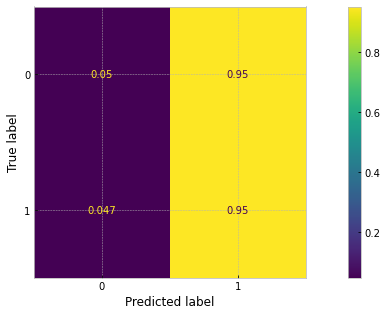

In [174]:
#Evaluo las métricas del modelo de random forest
plot_confusion_matrix(random_forest, x_test, y_test, normalize='true')

In [175]:
print('precision', np.round(precision_score(y_test, y_test_pred), 2))
print('recall', np.round(recall_score(y_test, y_test_pred), 2))
print('f1_score', np.round(f1_score(y_test, y_test_pred), 2))
print('accuracy', np.round(accuracy_score(y_test, y_test_pred), 2))

precision 0.83
recall 0.95
f1_score 0.89
accuracy 0.8


## CONCLUSIÓN

Para que los bancos puedan decidir de manera más eficiente que clientes deben ser aceptados y cuales rechazados a la hora de otorgarles un crédito, se recomienda utilizar un algoritmo de machine learning, ya que estos permiten optimizar los de decisiones y minimizar errores.
A lo largo del desarrollo del proyecto se entrenaron diversos modelos, para los cuales se balancearon los datos disponibles, mediante la técnica de SMOTE y se realizaron afinamientos de hiperparámetros. 
El modelo que mayor desempeño obtuvo es el de Regresión Logística con el afinamiento de hiperparámetros realizados en donde se obtuvo una tasa de verdaderos positivos (cliente aceptado) del 64%, una tasa de verdaderos negativos (cliente rechazado) del 37% y un f1-score de 0.89.
Finalmente, a pesar de que el uso del modelo de regresión logística puede agilizar el trabajo de los bancos los valores de las métricas resultantes no son suficientemente confiables, por lo que un analista debería verificar que los resultados arrojados por el modelo sean correctos. Para mejorar el modelo se recomienda recomendar más datos de clientes rechazados.

